#### Import packages

In [1]:
# data manipulation
library(dplyr)
library(tidyverse)

# visualizations
library(MASS)
library(ggplot2)
library(ggpubr)
library(gridExtra)
library(GGally)
library(ggjoy)

# machine learning
library(caret)
library(PerformanceAnalytics)


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v readr   1.3.1
v tibble  3.1.1     v purrr   0.3.2
v tidyr   1.1.3     v stringr 1.4.0
v ggplot2 3.3.5     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'MASS' was built under R version 3.6.3"
Attaching package: 'MASS'

The following object is masked f

#### Import data

In [34]:
# Importing the dataset
student_grades = read.csv('student_grades.csv')
head(student_grades)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0
GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,1


#### Checking the dataset

In [35]:
# inspect
str(student_grades)

'data.frame':	395 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [36]:
summary(student_grades)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [37]:
# check for missing data
sum(is.na(student_grades))
# distinct, duplicate data
sum(duplicated(student_grades))

[1] 0

[1] 0

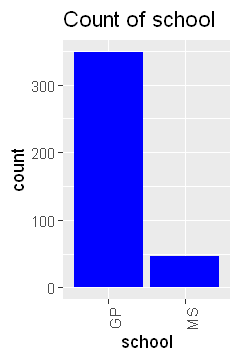

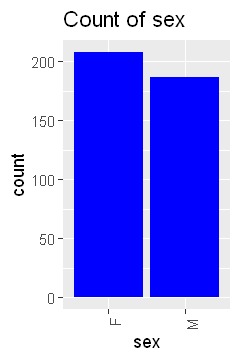

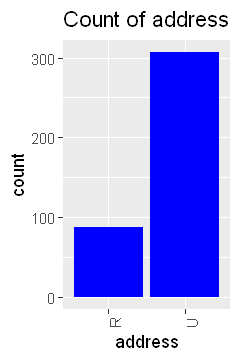

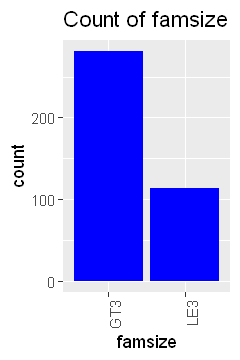

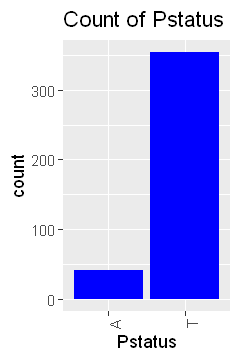

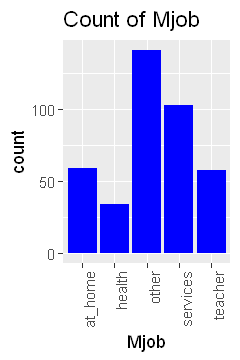

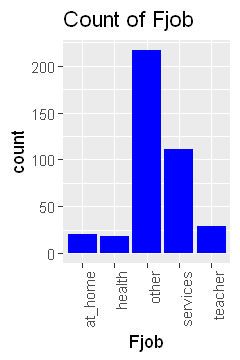

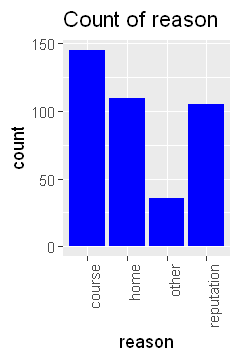

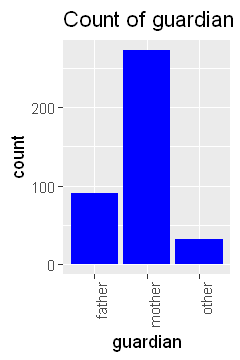

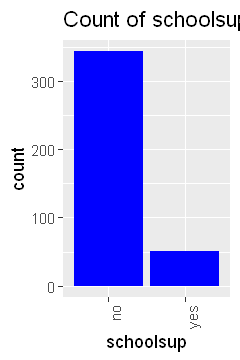

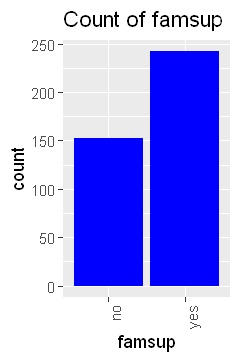

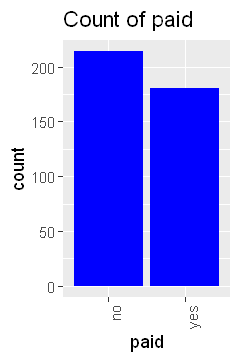

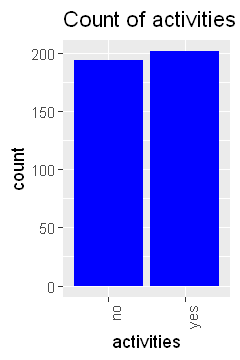

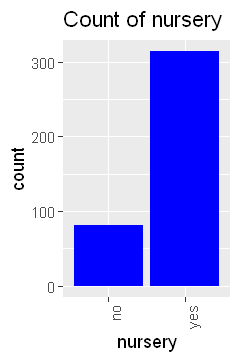

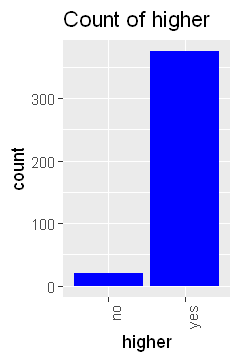

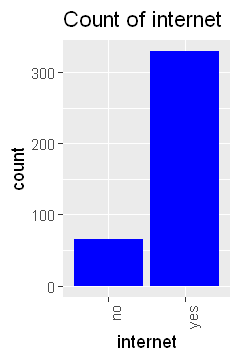

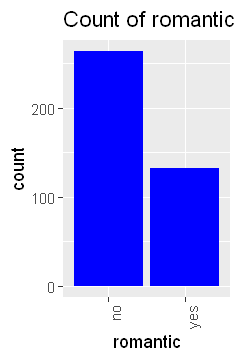

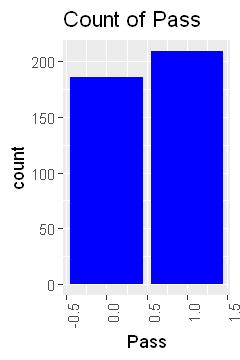

In [38]:
# firstly, let's look at the categorical variables
# Plotting all categorical features
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
          'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'Pass')
plot_box = function(df, col){
    options(repr.plot.width=2, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(x = col)) + 
            geom_bar(position="dodge", fill = 'Blue') + 
            ggtitle(paste('Count of', col)) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))
        print(p)
    }
}


plot_box(student_grades, cols)

In [39]:
# chnage to factor to see class seperation 
student_grades$Pass <- as.factor(as.character(student_grades$Pass))

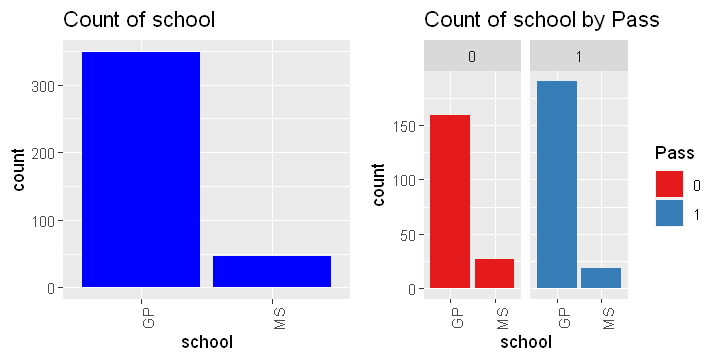

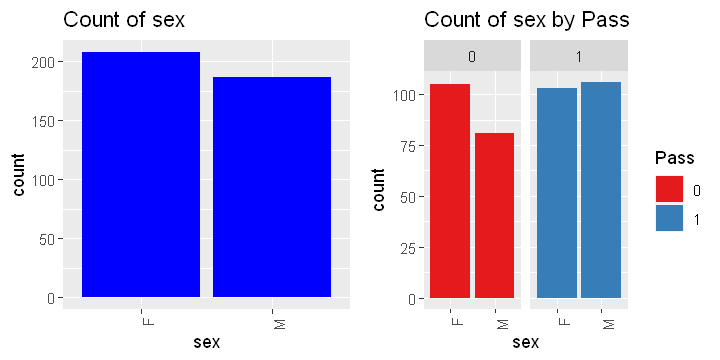

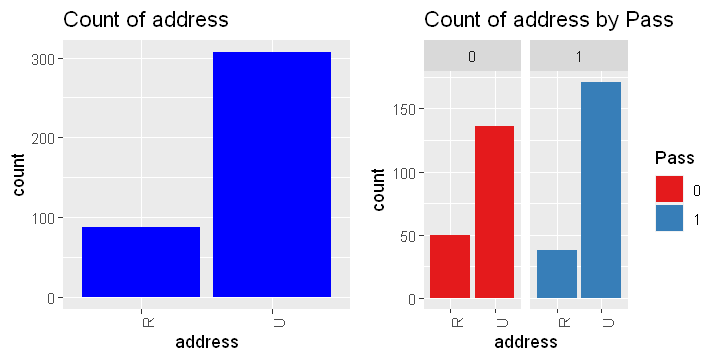

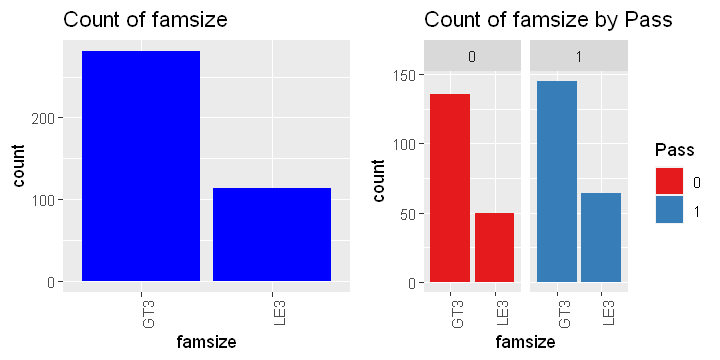

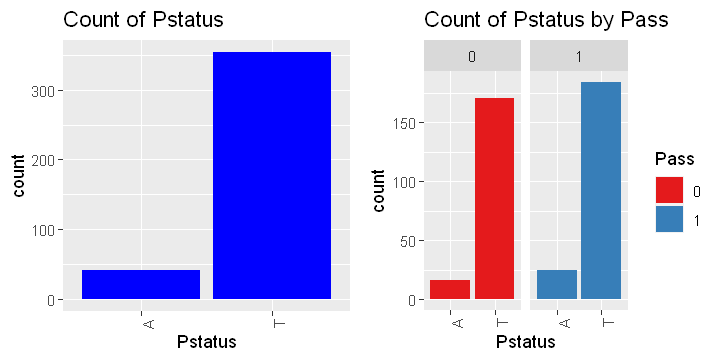

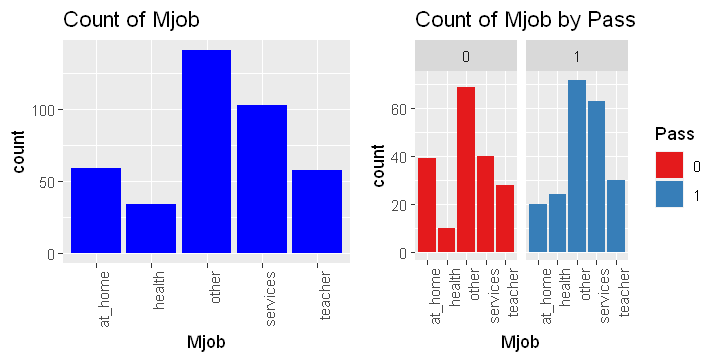

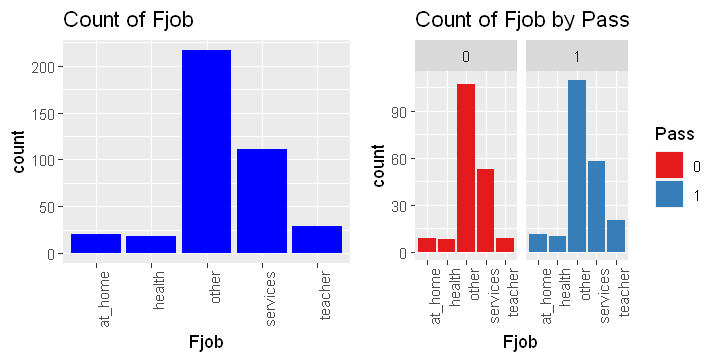

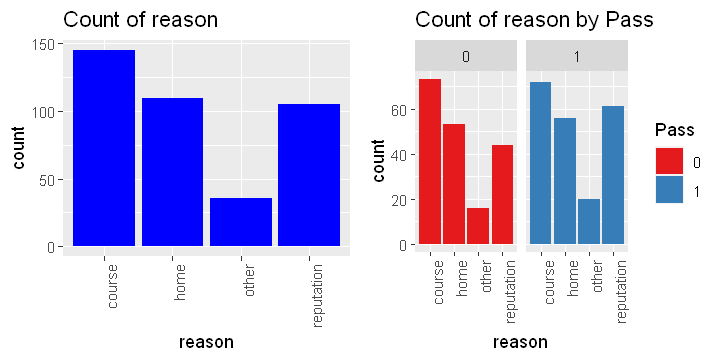

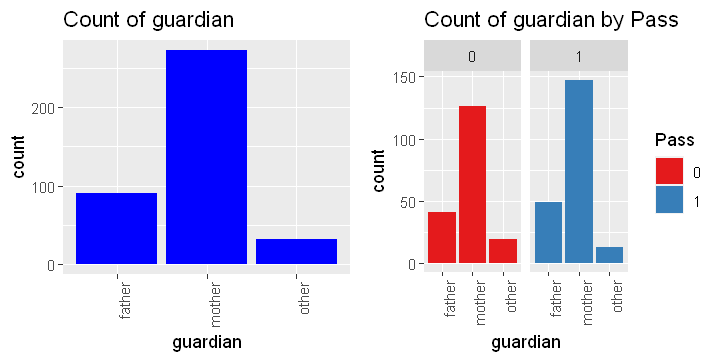

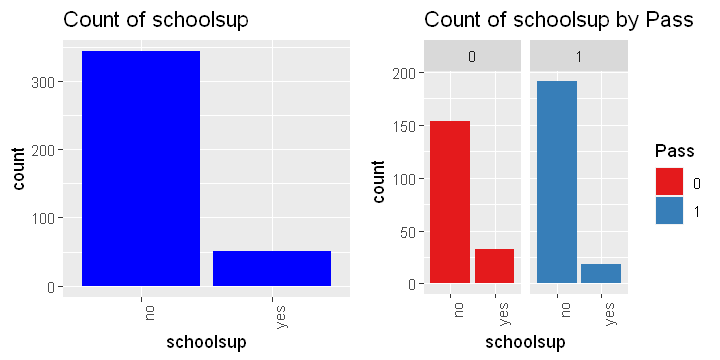

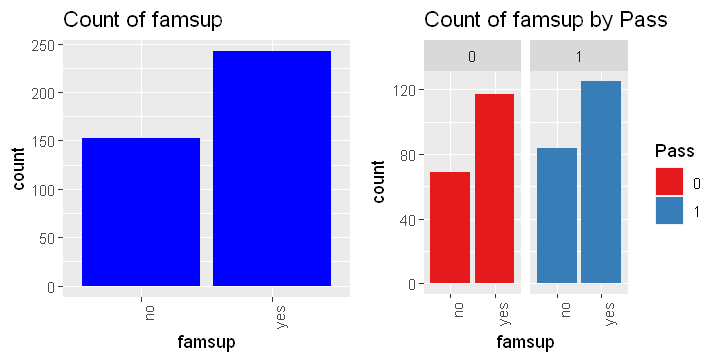

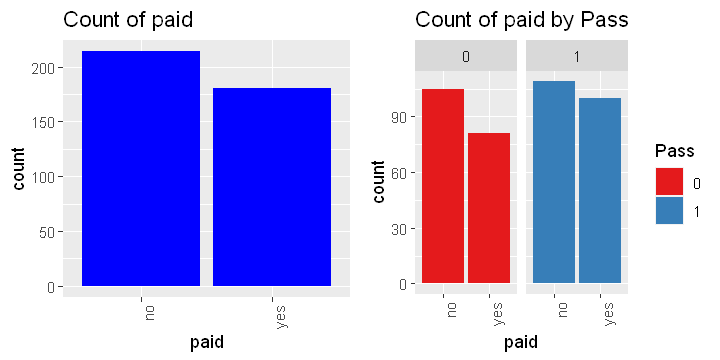

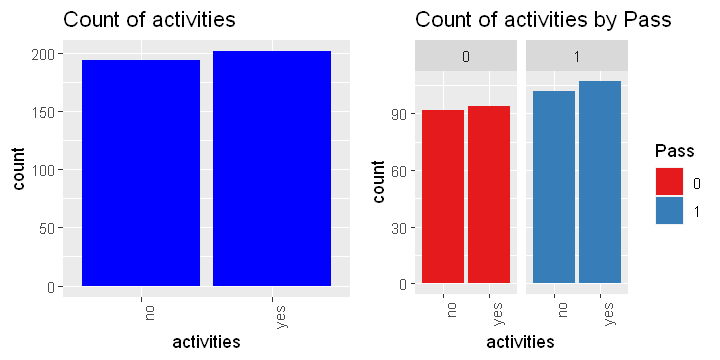

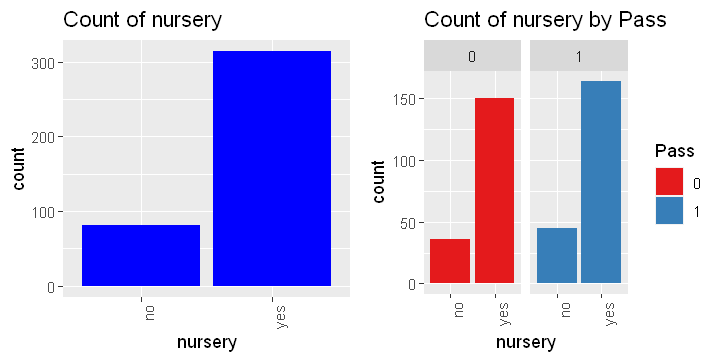

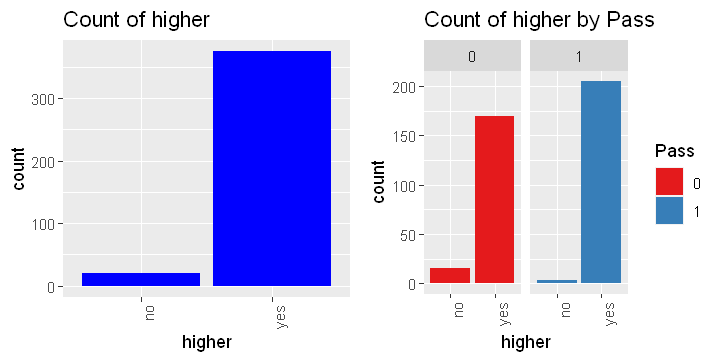

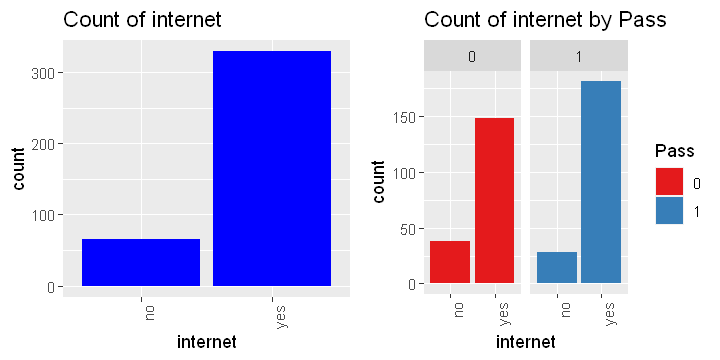

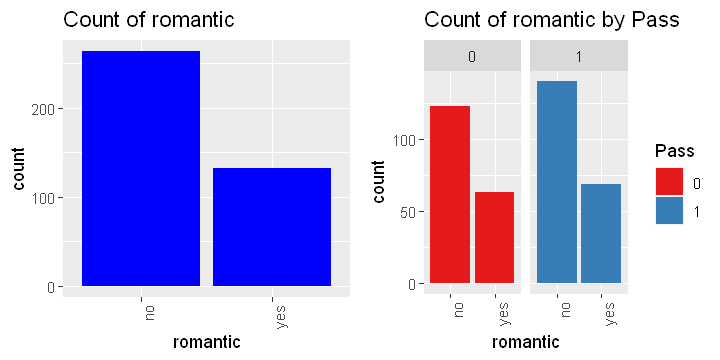

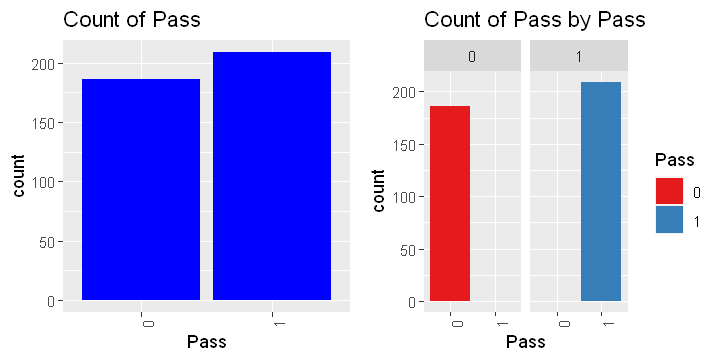

In [40]:
# inspect the categorical with the label seperation
# Plotting all categorical features, adding facetwrap and tilting the labels
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
          'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'Pass')
plot_box = function(df, col){
    options(repr.plot.width=6, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p1 = ggplot(df, aes_string(x = col)) + 
            geom_bar(position="dodge", fill = 'blue') + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            ggtitle(paste('Count of', col))
        
        p2 = ggplot(df, aes_string(x = col, fill = 'Pass')) + 
            geom_bar(position="dodge") +
            facet_wrap(~Pass) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Count of', col, 'by Pass'))
        grid.arrange(p1,p2, nrow = 1)
        
    }
}


plot_box(student_grades, cols)

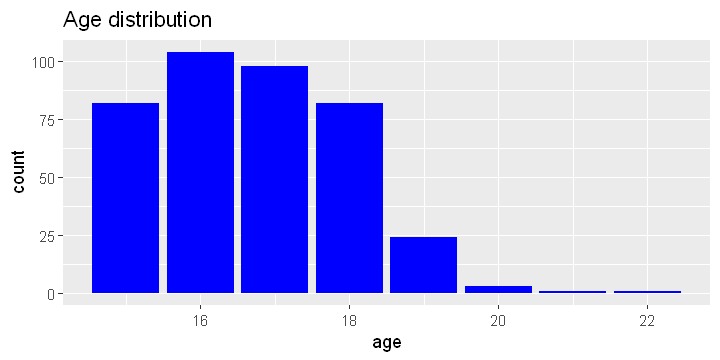

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


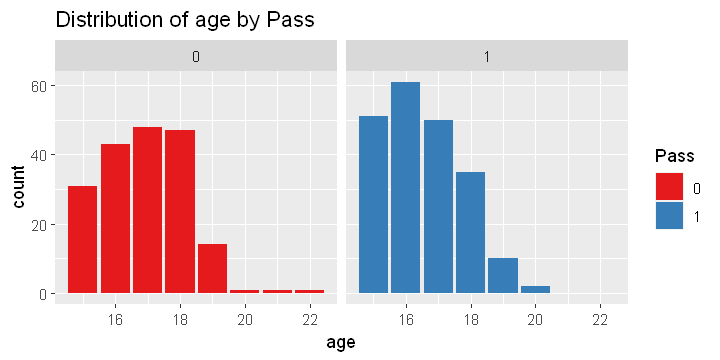

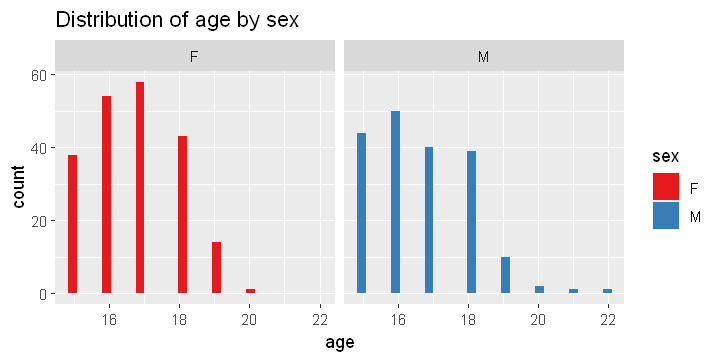

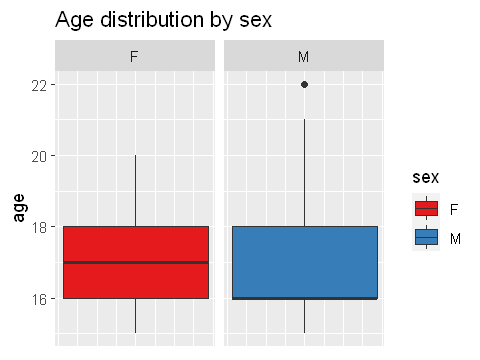

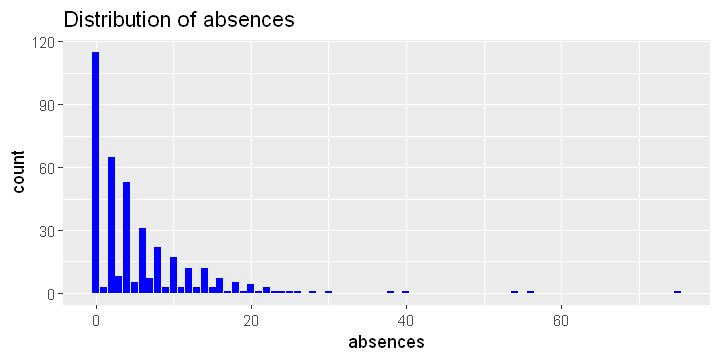

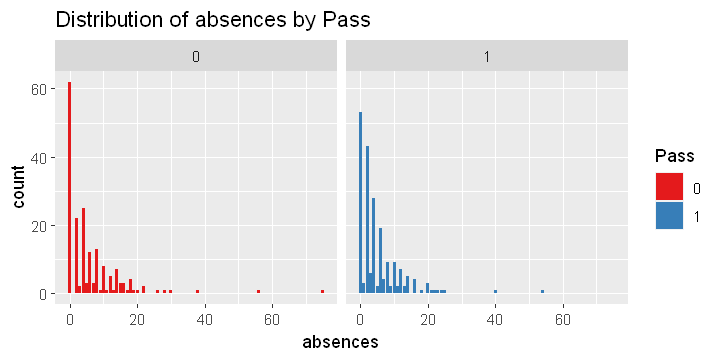

In [48]:
# Looking at the distributions of age and absences
options(repr.plot.width=6, repr.plot.height=3)
ggplot(student_grades, aes(age)) +
geom_bar(fill = 'blue') +
labs(title = 'Age distribution')

ggplot(student_grades, aes( age, fill = Pass)) +
geom_bar() +
facet_wrap(~Pass) +
scale_fill_brewer(palette = 'Set1') +
labs(title = 'Distribution of age by Pass')

ggplot(student_grades, aes( age, fill = sex)) +
geom_histogram() +
facet_wrap(~sex) +
scale_fill_brewer(palette = 'Set1') +
labs(title = 'Distribution of age by sex')

options(repr.plot.width=4, repr.plot.height=3)
ggplot(student_grades, aes(y = age, fill = sex)) +
geom_boxplot() + facet_wrap(~sex) + theme(axis.text.x=element_blank (), axis.ticks.x=element_blank ()) +
scale_fill_brewer(palette = 'Set1') +
labs(title = 'Age distribution by sex')

options(repr.plot.width=6, repr.plot.height=3)
ggplot(student_grades, aes(absences)) +
geom_bar(fill = 'blue') +
labs(title = 'Distribution of absences')

ggplot(student_grades, aes(absences, fill = Pass)) +
geom_bar() +
facet_wrap(~Pass) +
scale_fill_brewer(palette = 'Set1') +
labs(title = 'Distribution of absences by Pass')

In [12]:
table(student_grades$absences)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
115   3  65   8  53   5  31   7  22   3  17   3  12   3  12   3   7   1   5   1 
 20  21  22  23  24  25  26  28  30  38  40  54  56  75 
  4   1   3   1   1   1   1   1   1   1   1   1   1   1 

In [13]:
pass <- student_grades %>%
filter(Pass == 1)

In [14]:
table(pass$absences)


 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 20 21 22 23 24 25 40 54 
53  3 43  6 28  2 19  4  9  2  9  2  7  2  5  4  1  3  1  1  1  1  1  1  1 

In [15]:
fail <- student_grades %>%
filter(Pass == 0)

In [16]:
table(fail$absences)


 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 26 28 30 38 56 
62 22  2 25  3 12  3 13  1  8  1  5  1  7  3  3  1  4  1  1  2  1  1  1  1  1 
75 
 1 

#### Exploratory data analysis

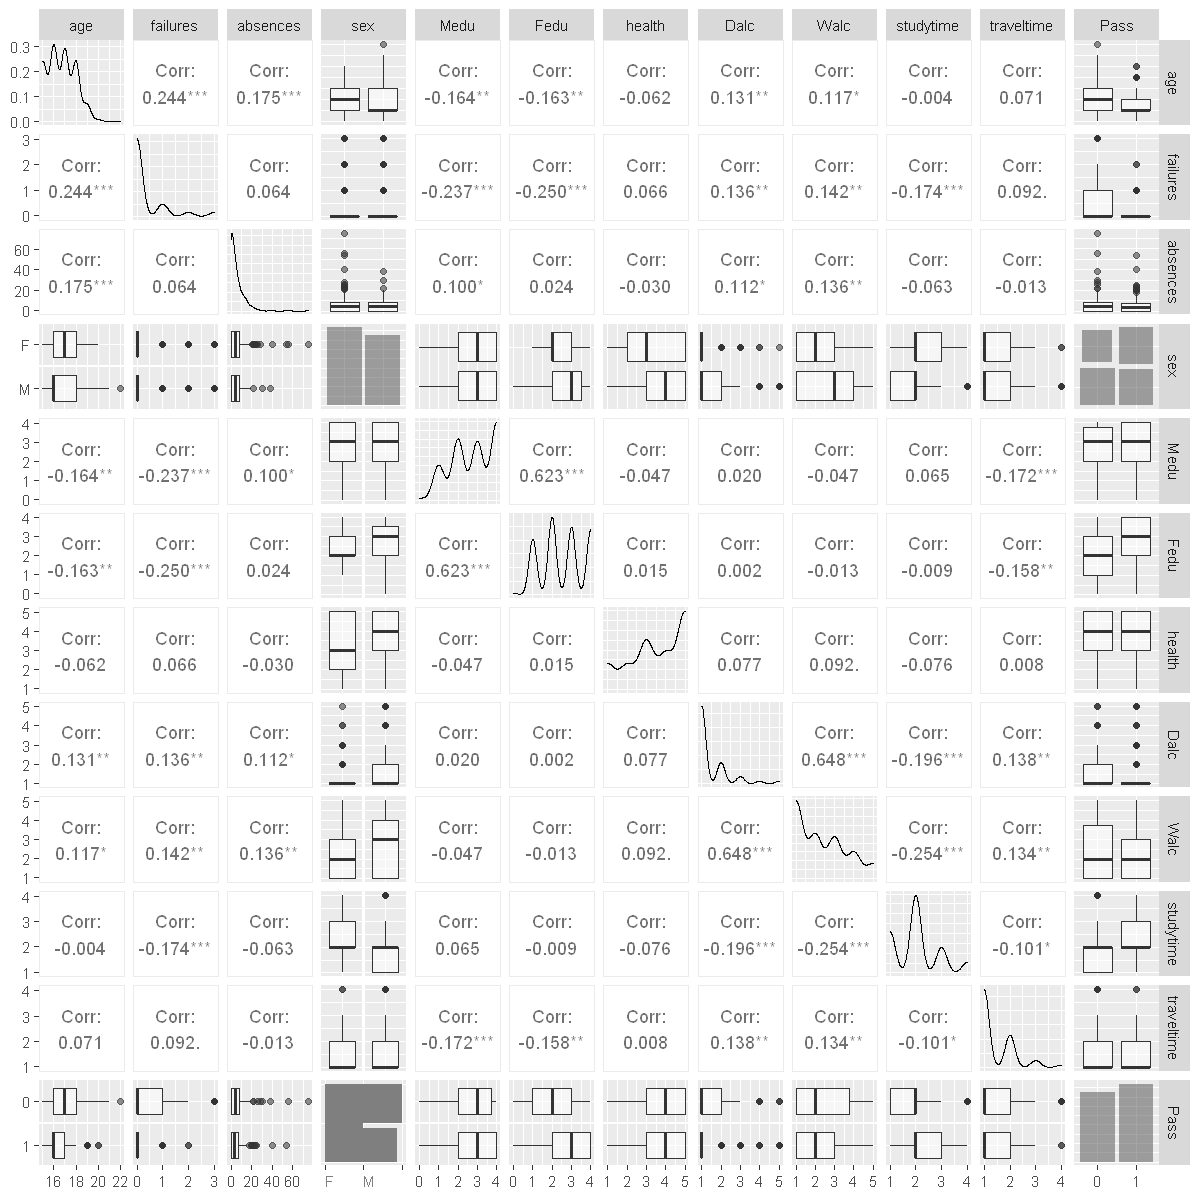

In [17]:
# exploring correlation between numerical features
numcols = c('age', 'failures', 'absences', 'sex', 'Medu', 'Fedu', 'health', 'Dalc', 'Walc', 'studytime',
            'traveltime', 'Pass')
options(repr.plot.width=10, repr.plot.height=10)
ggpairs(student_grades, columns = numcols, aes(alpha = 0.1), upper = list(continuous = "cor", combo = "box_no_facet"),
  lower = list(continuous = "cor", combo = "box", discrete = 'ratio'))

In [18]:
# the plot above does not show the correlation coefficients of the features with the label as Pass is a factor. 
# convert Pass to numeric again and re-run the pair plots
student_grades$Pass <- as.numeric(as.character(student_grades$Pass))

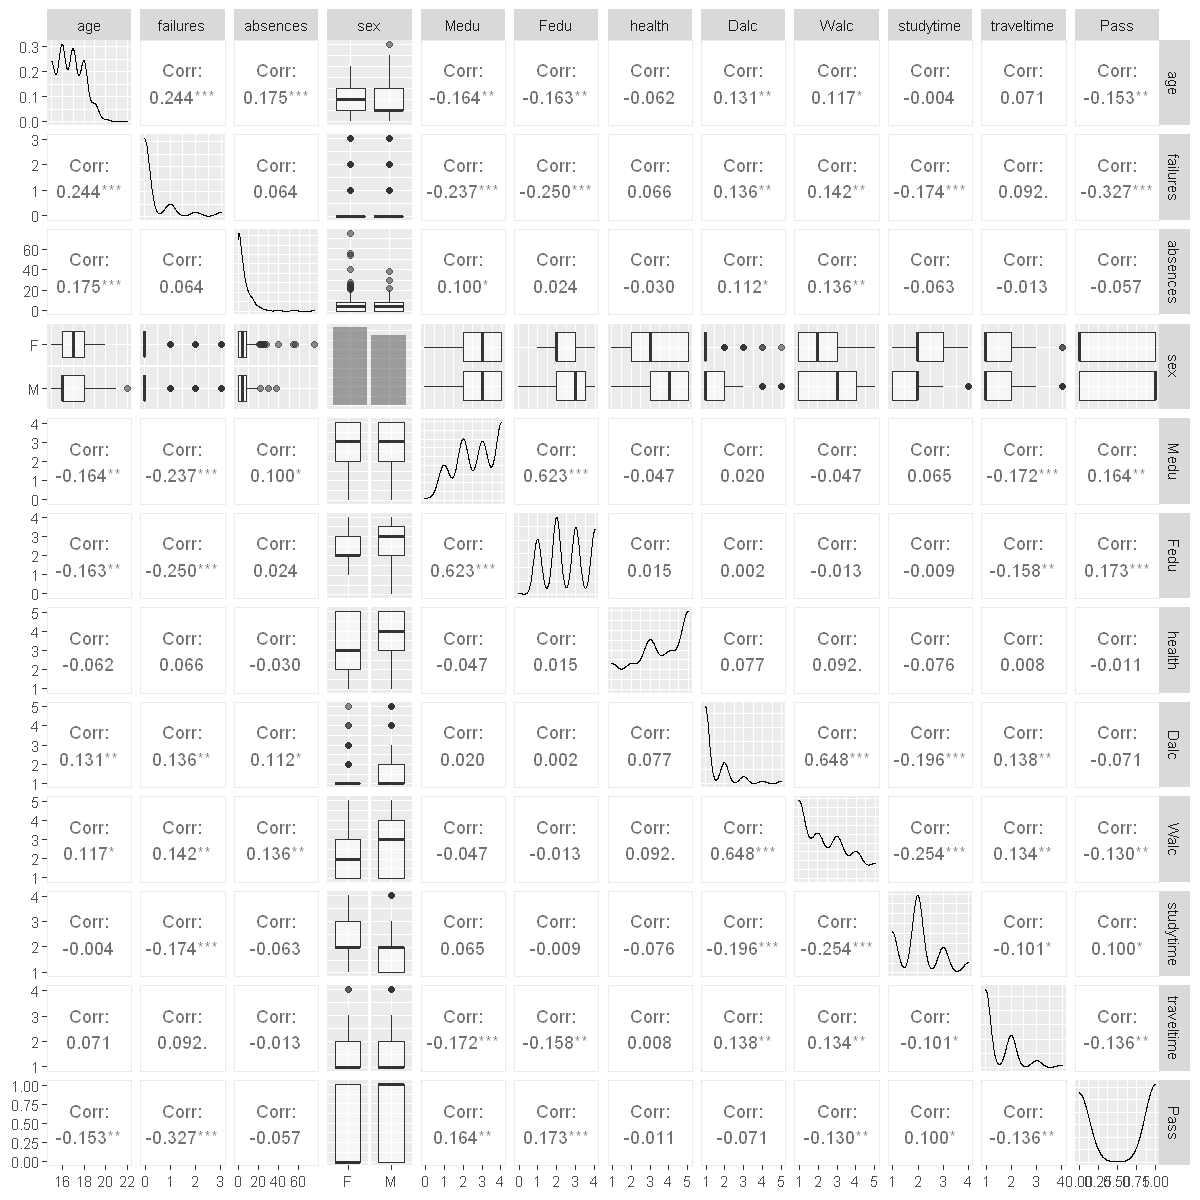

In [20]:
numcols = c('age', 'failures', 'absences', 'sex', 'Medu', 'Fedu', 'health', 'Dalc', 'Walc', 'studytime',
            'traveltime', 'Pass')
options(repr.plot.width=10, repr.plot.height=10)
ggpairs(student_grades, columns = numcols, aes(alpha = 0.1), upper = list(continuous = "cor", combo = "box_no_facet"),
  lower = list(continuous = "cor", combo = "box", discrete = 'ratio'))

Categorical features

In [21]:
names(student_grades)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "Pass"

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


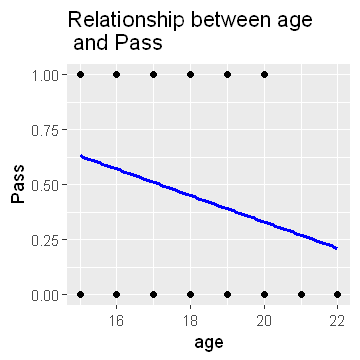

`geom_smooth()` using formula 'y ~ x'


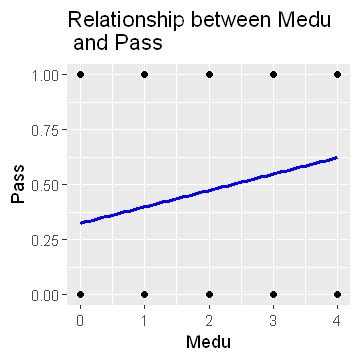

`geom_smooth()` using formula 'y ~ x'


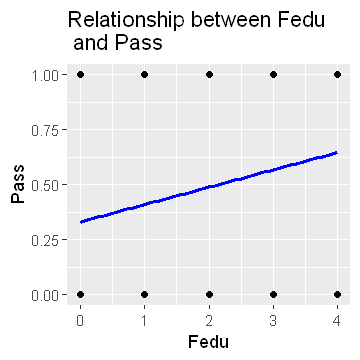

`geom_smooth()` using formula 'y ~ x'


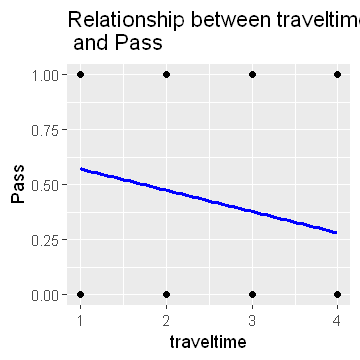

`geom_smooth()` using formula 'y ~ x'


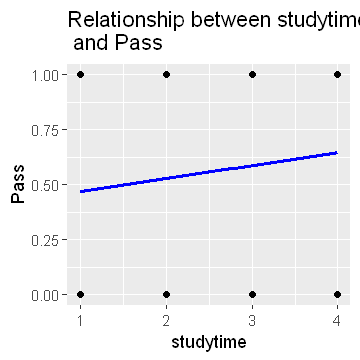

`geom_smooth()` using formula 'y ~ x'


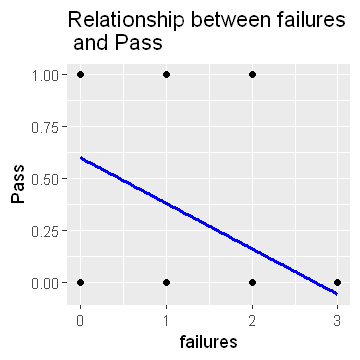

`geom_smooth()` using formula 'y ~ x'


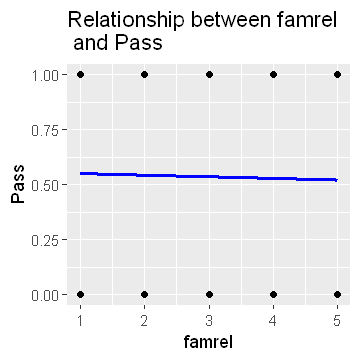

`geom_smooth()` using formula 'y ~ x'


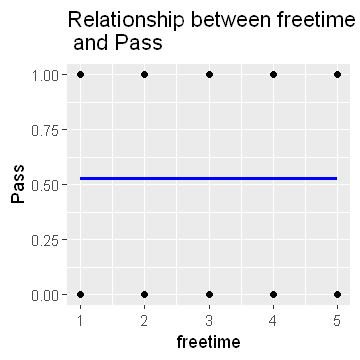

`geom_smooth()` using formula 'y ~ x'


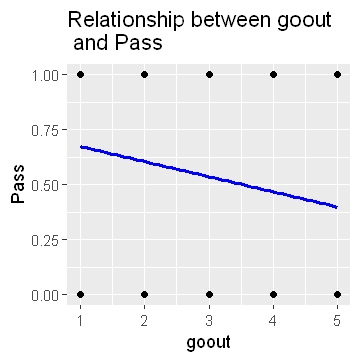

`geom_smooth()` using formula 'y ~ x'


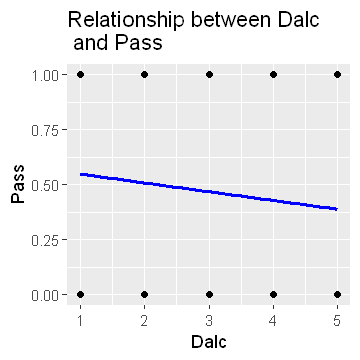

`geom_smooth()` using formula 'y ~ x'


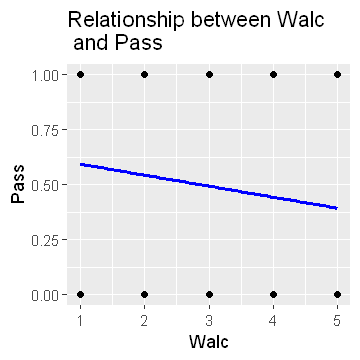

`geom_smooth()` using formula 'y ~ x'


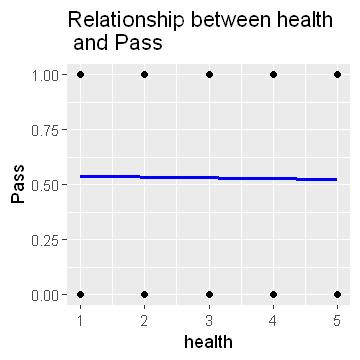

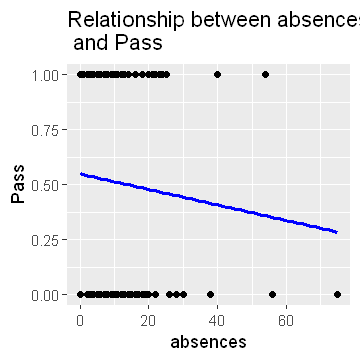

In [22]:
# checking the relationships between the features and the label
cols = c('age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
         'health', 'absences')
plot_box = function(df, col, col_x = 'Pass'){
    options(repr.plot.width=3, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_x)) + 
                   geom_point() +
                   stat_smooth(method = 'lm', col = 'blue', se = FALSE, size = 1) +
                   ggtitle(paste('Relationship between', col, '\n and', col_x))
        print(p)
    }
}


plot_box(student_grades, cols) 

In [20]:
table(pass$sex)


  F   M 
103 106 

In [21]:
table(fail$sex)


  F   M 
105  81 

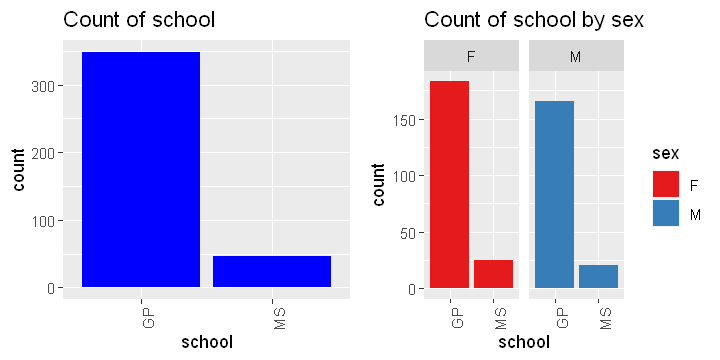

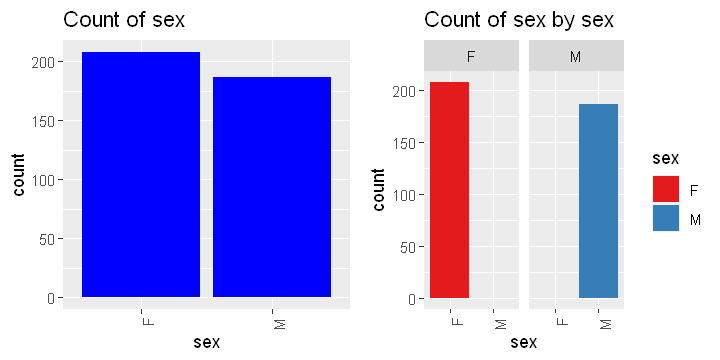

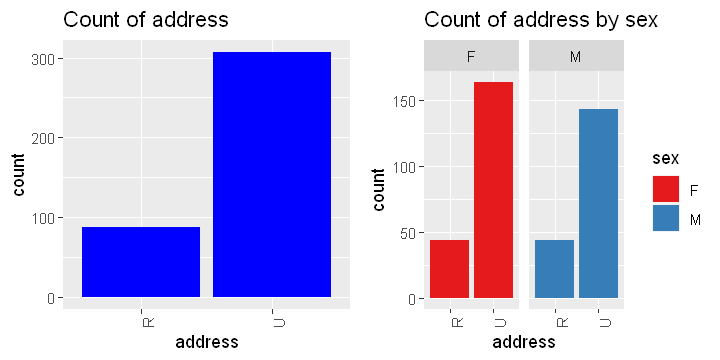

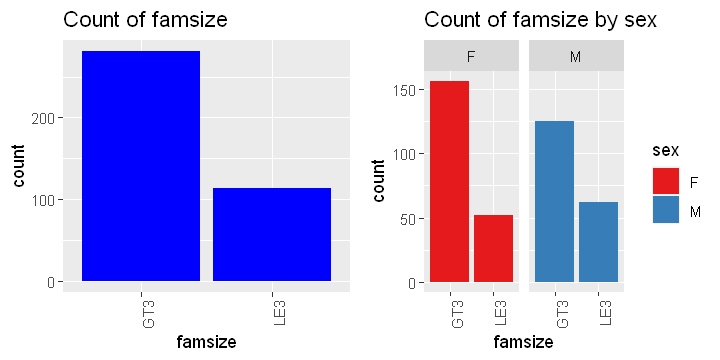

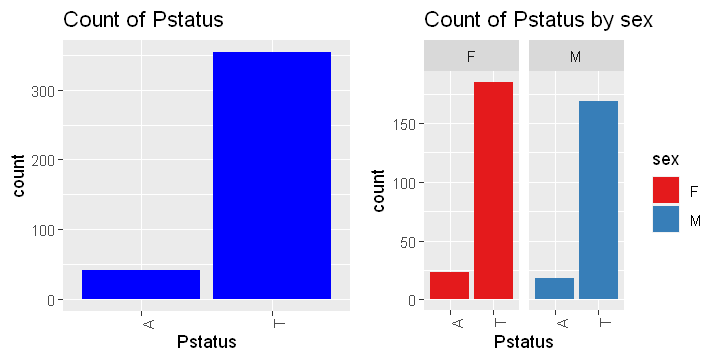

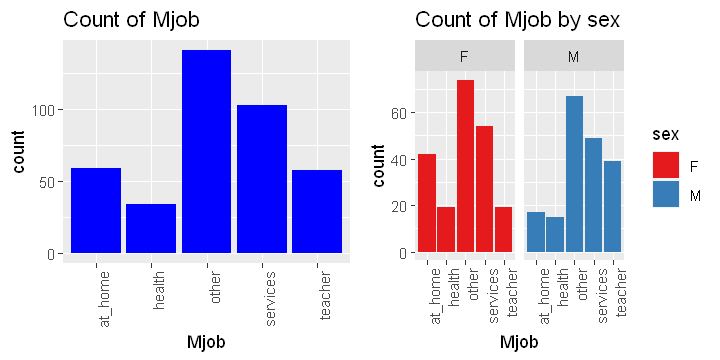

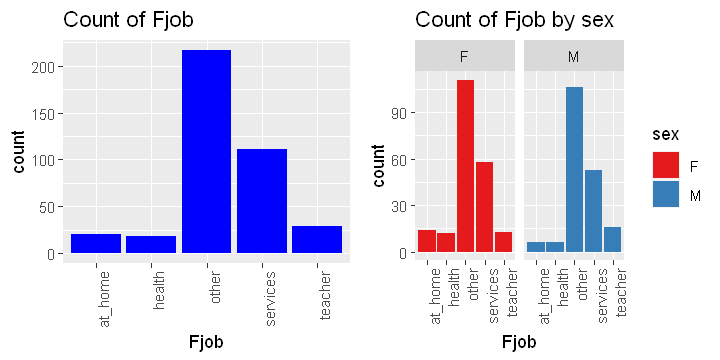

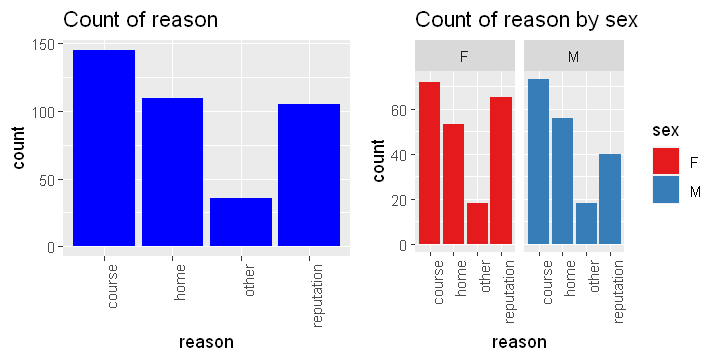

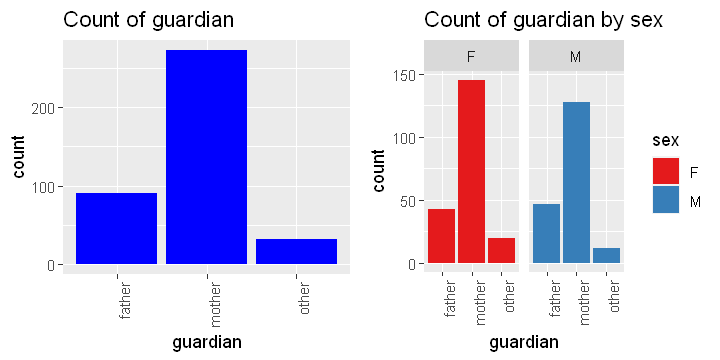

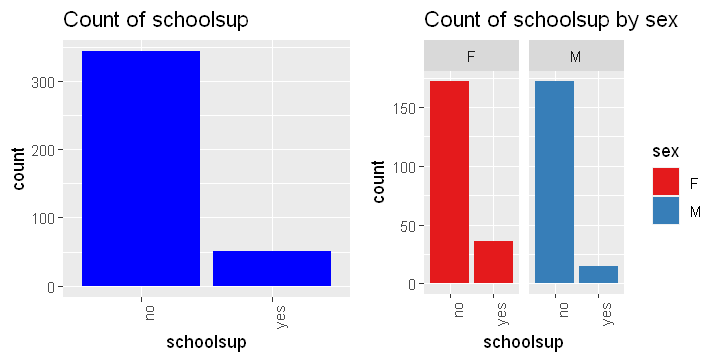

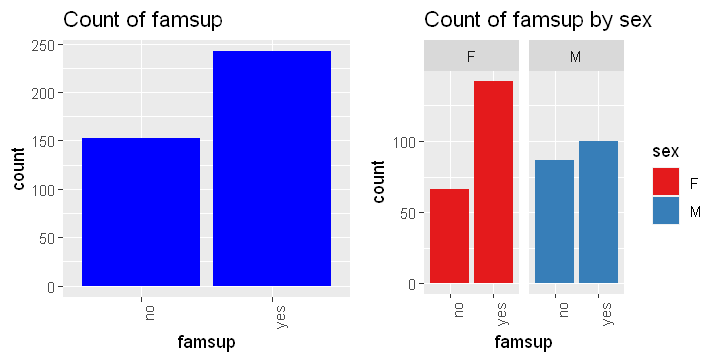

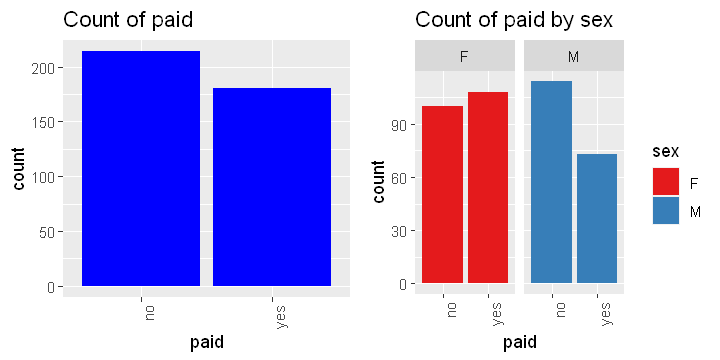

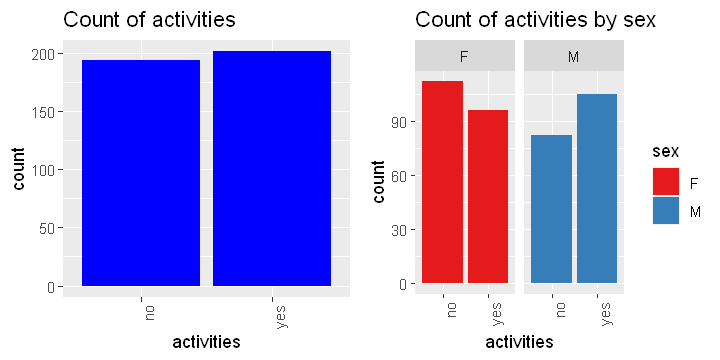

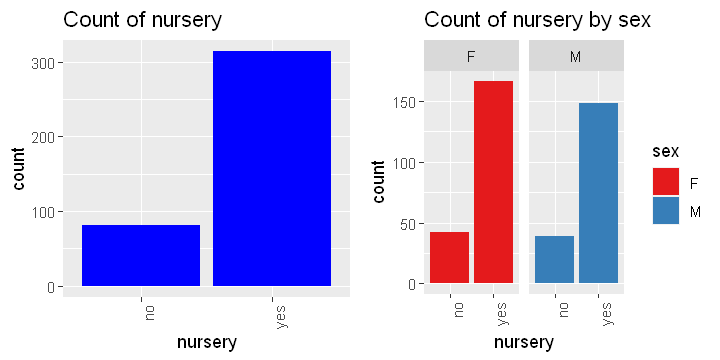

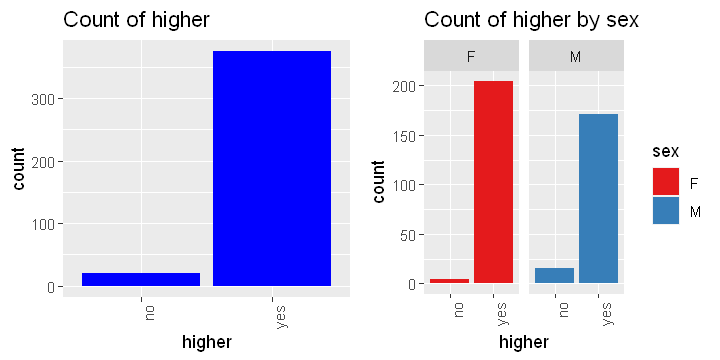

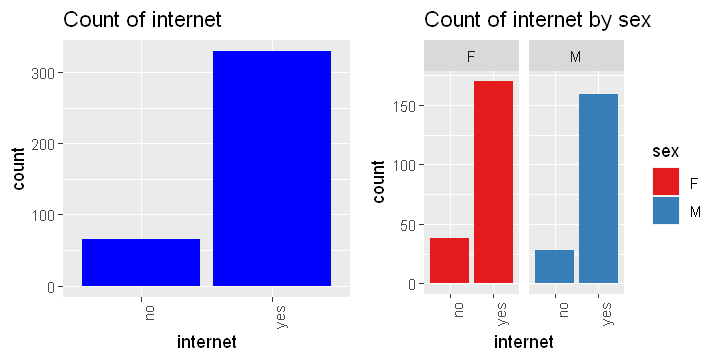

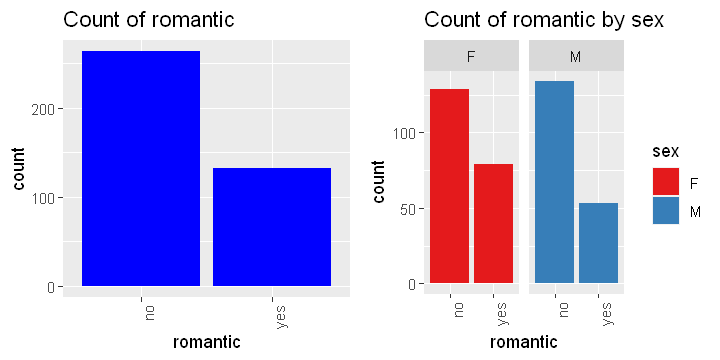

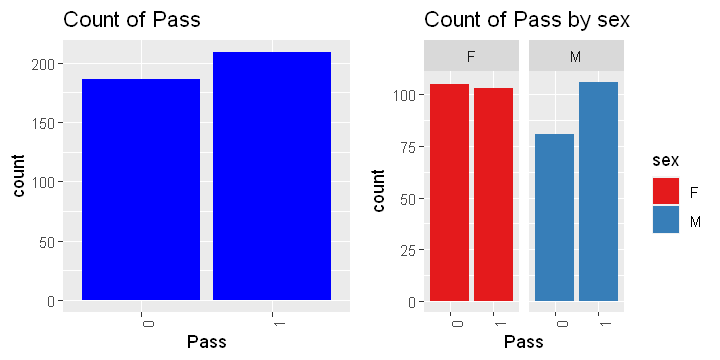

In [22]:
# look at seperation by sex
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
          'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'Pass')
plot_box = function(df, col){
    options(repr.plot.width=6, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p1 = ggplot(df, aes_string(x = col)) + 
            geom_bar(position="dodge", fill = 'blue') + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            ggtitle(paste('Count of', col))
        
        p2 = ggplot(df, aes_string(x = col, fill = 'sex')) + 
            geom_bar(position="dodge") +
            facet_wrap(~sex) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Count of', col, 'by sex'))
        grid.arrange(p1,p2, nrow = 1)
        
    }
}


plot_box(student_grades, cols)

Data preparation

In [49]:
# some variable types should be corrected.
# Medu, Fedu, traveltime, studytime, famrel, freetime, goout, Dalc, Walc, health, Pass should be changed to factor
student_grades$Medu <- as.factor(student_grades$Medu)
student_grades$Fedu <- as.factor(student_grades$Fedu)
student_grades$traveltime <- as.factor(student_grades$traveltime)
student_grades$studytime <- as.factor(student_grades$studytime)
student_grades$famrel <- as.factor(student_grades$famrel)
student_grades$freetime <- as.factor(student_grades$freetime)
student_grades$goout <- as.factor(student_grades$goout)
student_grades$Dalc <- as.factor(student_grades$Dalc)
student_grades$Walc <- as.factor(student_grades$Walc)
student_grades$health <- as.factor(student_grades$health)
student_grades$Pass <- as.factor(student_grades$Pass)
student_grades$failures <- as.factor(student_grades$failures)

In [24]:
str(student_grades)

'data.frame':	395 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ Fedu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: Factor w/ 4 levels "1","2","3","4": 2 1 1 1 1 1 1 2 1 1 ...
 $ studytime 

In [25]:
summary(student_grades)

 school   sex          age       address famsize   Pstatus Medu    Fedu   
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   0:  3   0:  2  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1: 59   1: 82  
                  Median :17.0                             2:103   2:115  
                  Mean   :16.7                             3: 99   3:100  
                  3rd Qu.:18.0                             4:131   4: 96  
                  Max.   :22.0                                            
       Mjob           Fjob            reason      guardian   traveltime
 at_home : 59   at_home : 20   course    :145   father: 90   1:257     
 health  : 34   health  : 18   home      :109   mother:273   2:107     
 other   :141   other   :217   other     : 36   other : 32   3: 23     
 services:103   services:111   reputation:105                4:  8     
 teacher : 58   teacher : 29                                           
                                           

In [26]:
names(student_grades)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "Pass"

Picking joint bandwidth of 0.375
Picking joint bandwidth of 0.416


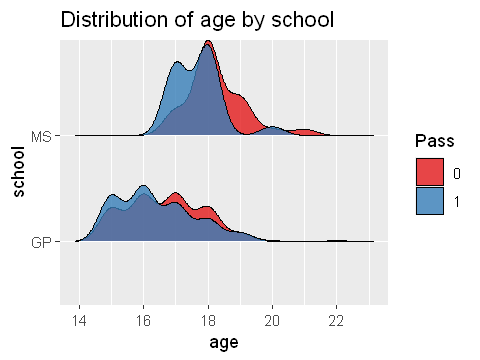

Picking joint bandwidth of 0.472


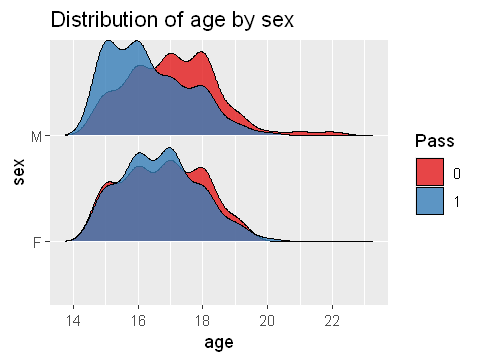

Picking joint bandwidth of 0.461


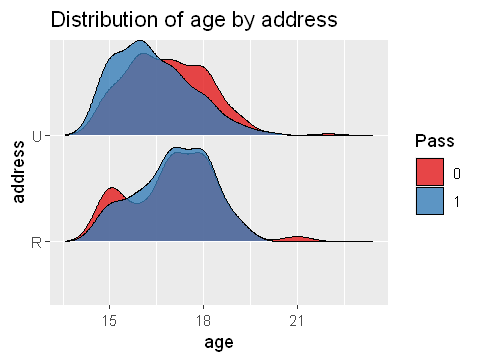

Picking joint bandwidth of 0.442


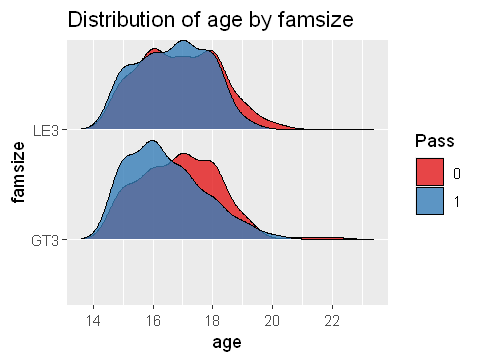

Picking joint bandwidth of 0.488


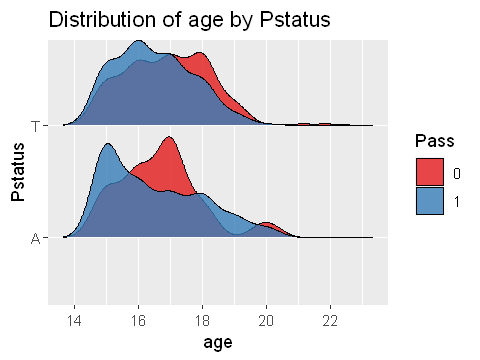

Picking joint bandwidth of 0.482


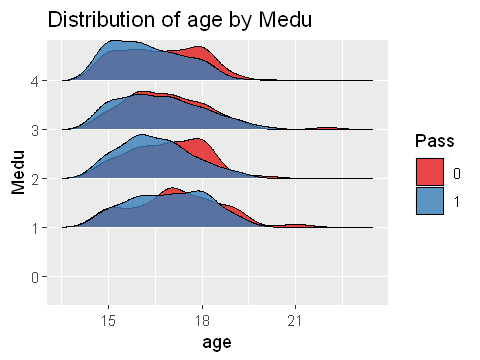

Picking joint bandwidth of 0.526


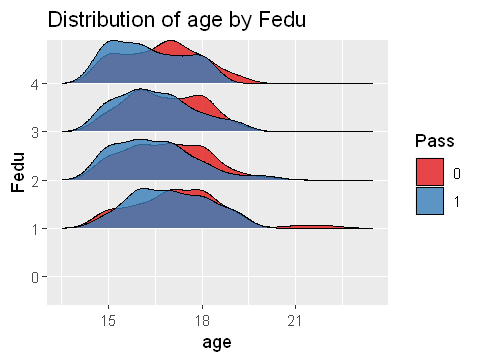

Picking joint bandwidth of 0.523


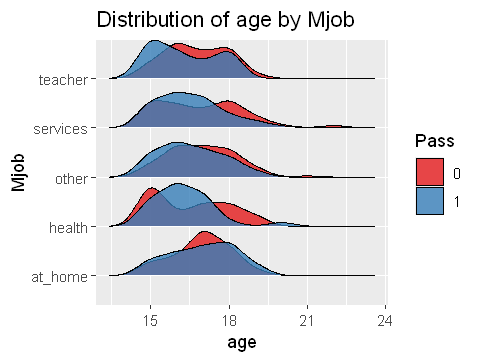

Picking joint bandwidth of 0.506


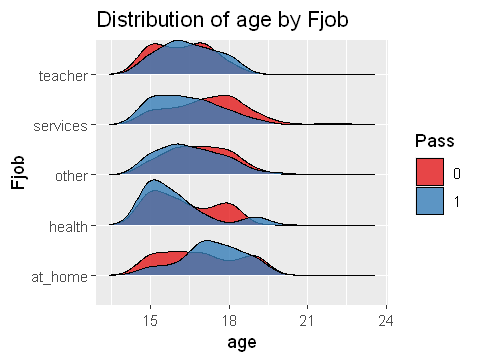

Picking joint bandwidth of 0.446


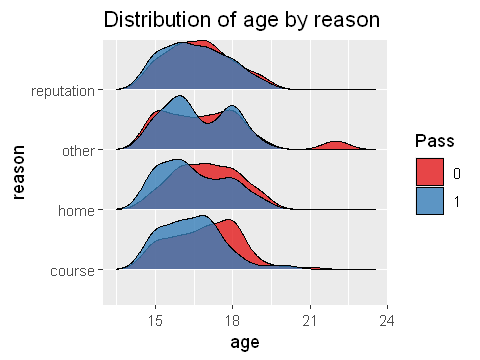

Picking joint bandwidth of 0.55


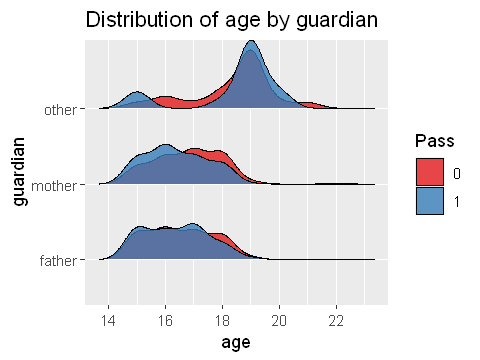

Picking joint bandwidth of 0.545


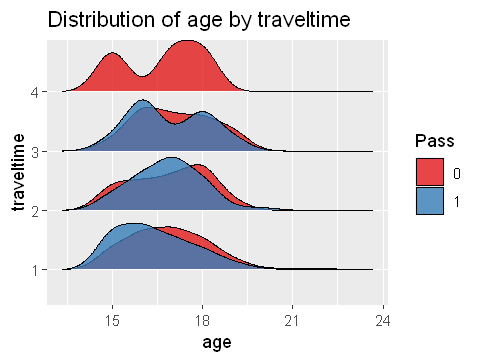

Picking joint bandwidth of 0.568


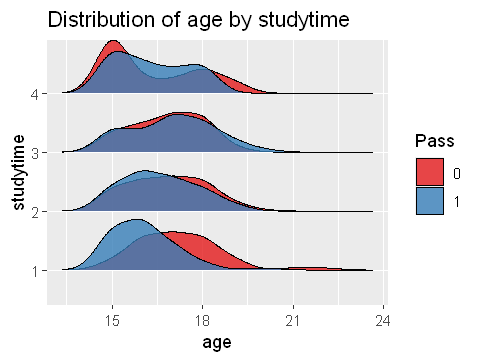

Picking joint bandwidth of 0.334


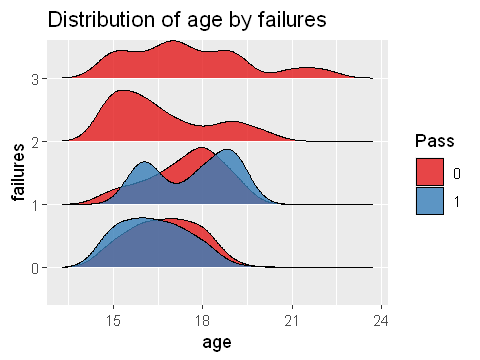

Picking joint bandwidth of 0.459


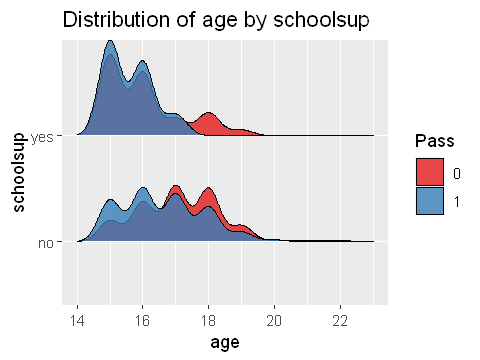

Picking joint bandwidth of 0.411


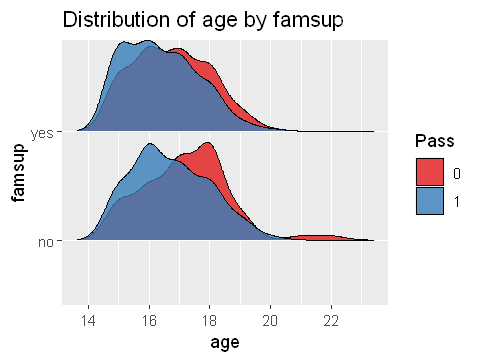

Picking joint bandwidth of 0.453


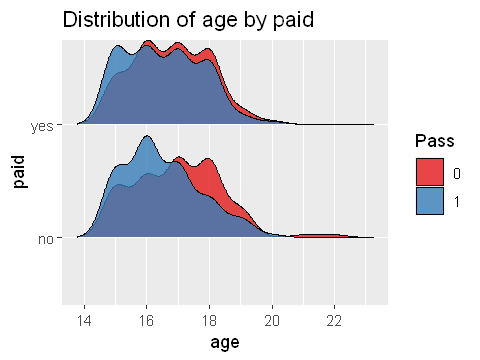

Picking joint bandwidth of 0.419


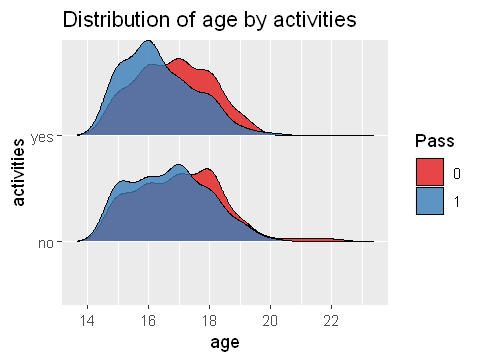

Picking joint bandwidth of 0.352


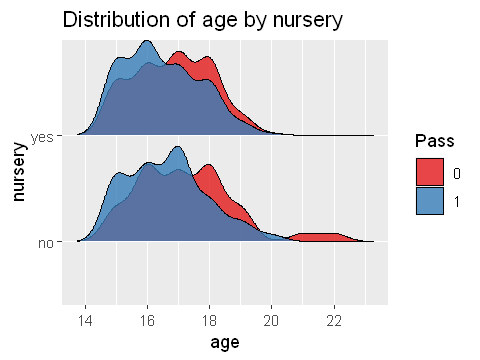

Picking joint bandwidth of 0.508


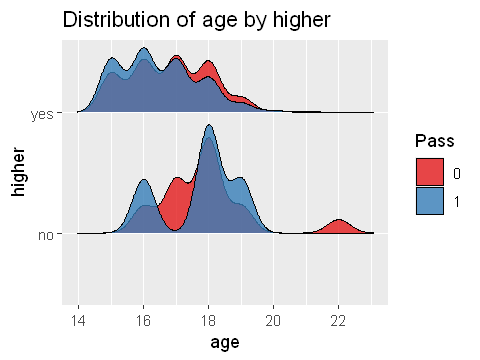

Picking joint bandwidth of 0.459


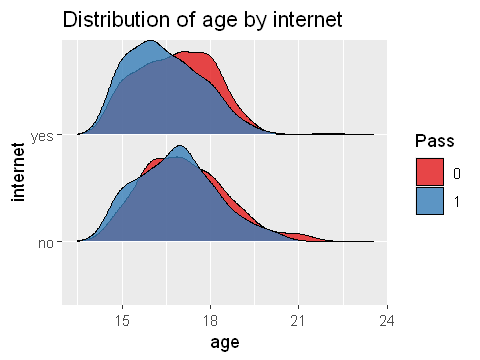

Picking joint bandwidth of 0.552


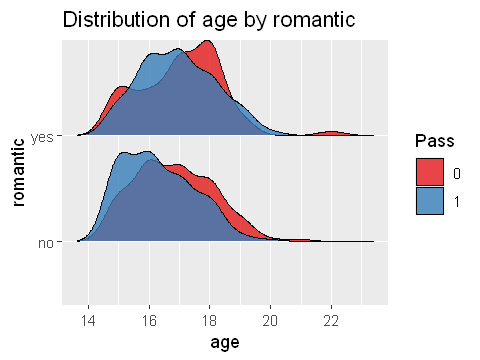

Picking joint bandwidth of 0.517


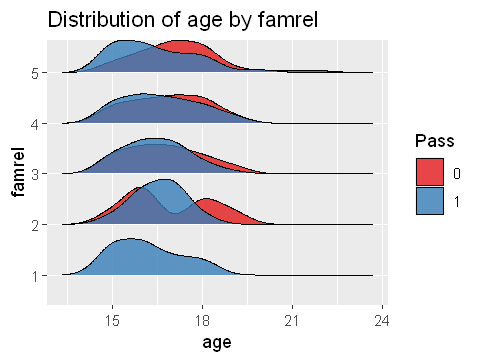

Picking joint bandwidth of 0.492


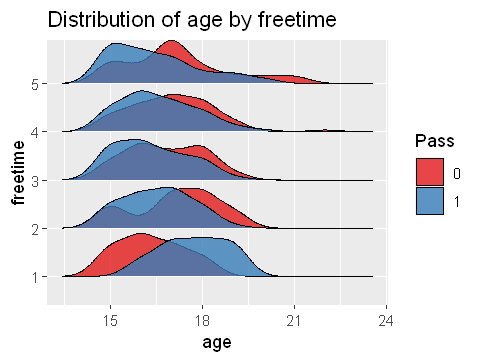

Picking joint bandwidth of 0.688


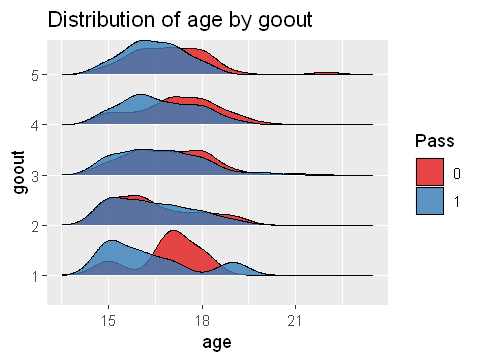

Picking joint bandwidth of 0.462


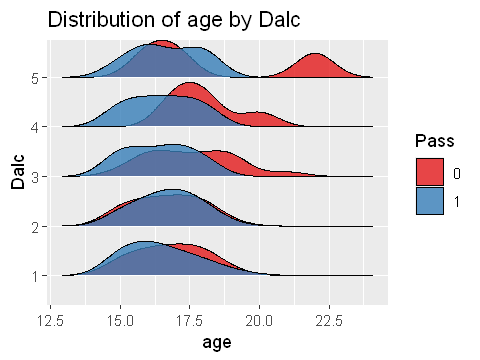

Picking joint bandwidth of 0.521


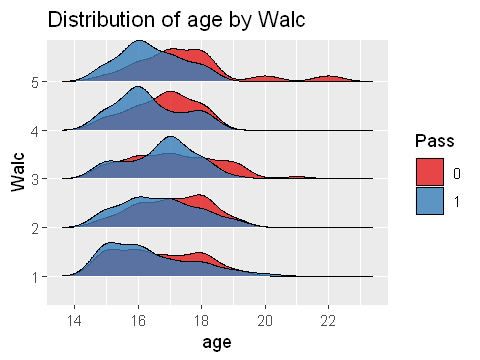

Picking joint bandwidth of 0.323


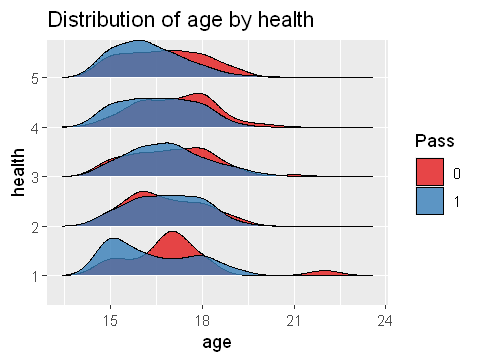

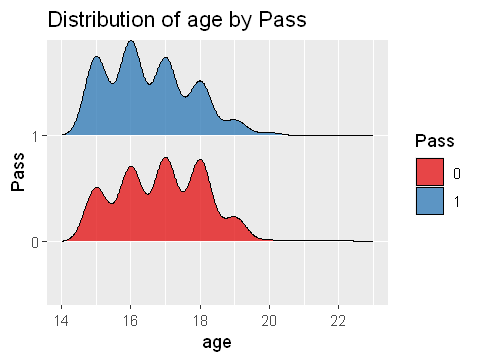

In [57]:
# Get the proportions of all categorical features by age using scale = 0.9 to aviod overlap
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
         'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Pass')
plot_box = function(df, col, col_x = 'age'){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(x = col_x, y = col, fill = 'Pass')) + 
            geom_joy(scale = 0.9, alpha = 0.8) + 
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Distribution of', col_x, 'by', col)) 
        print(p)
    }
}


plot_box(student_grades, cols) 

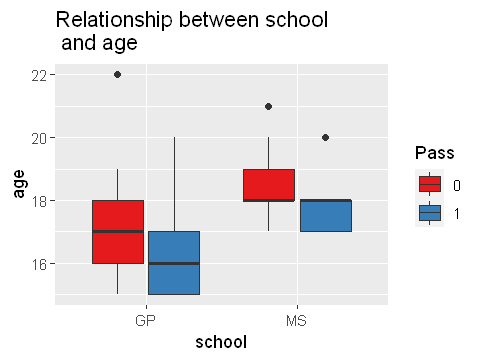

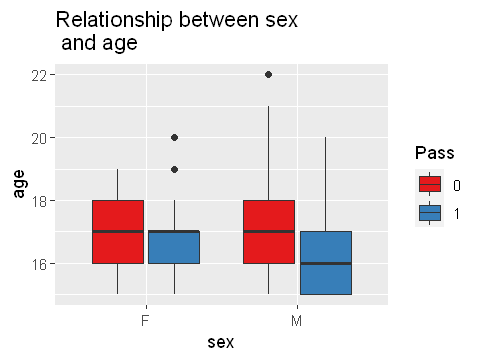

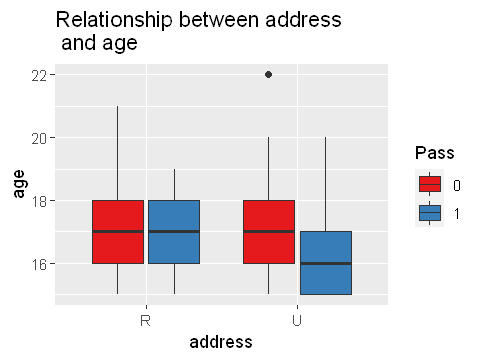

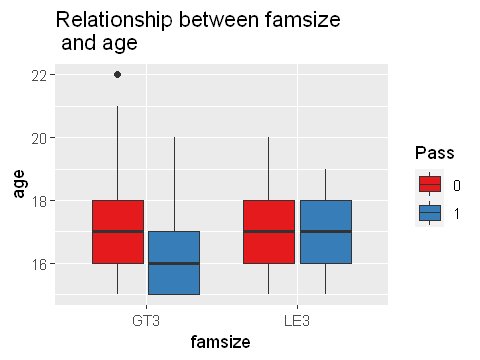

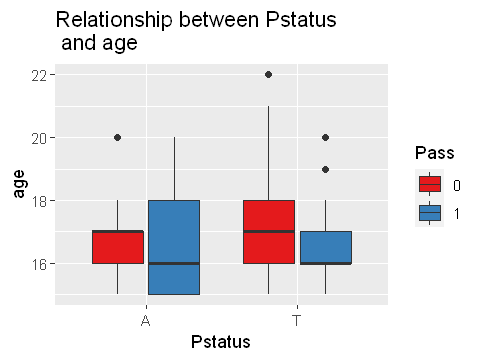

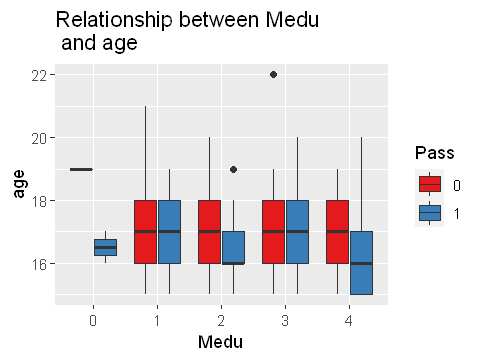

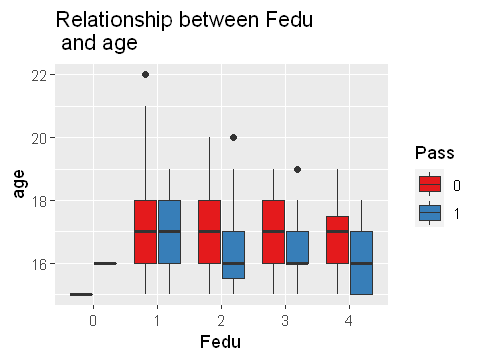

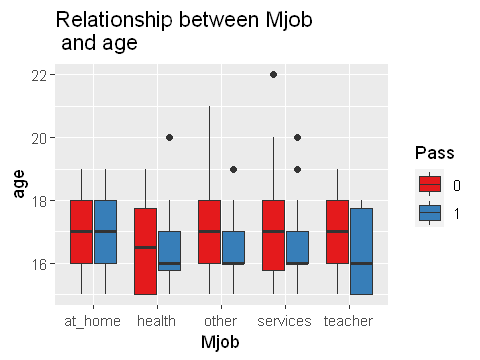

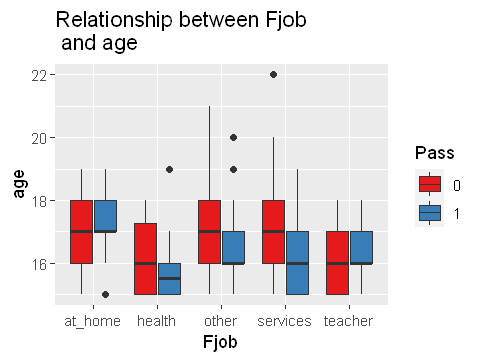

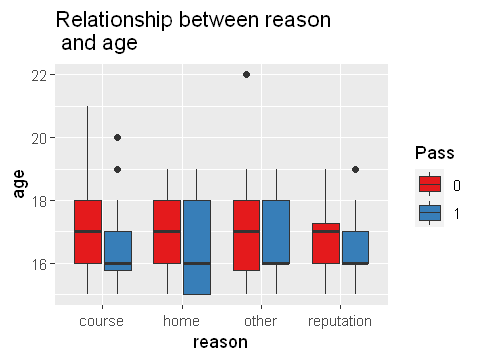

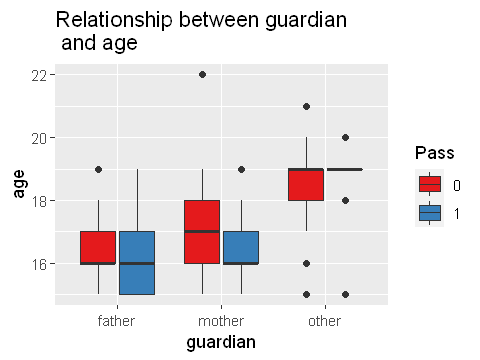

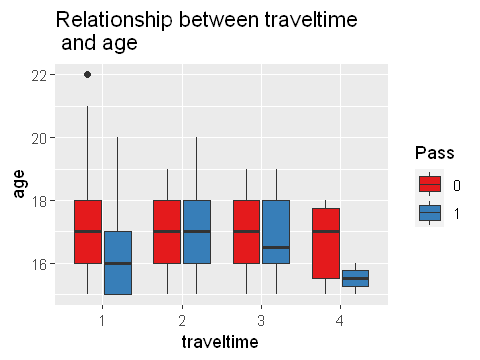

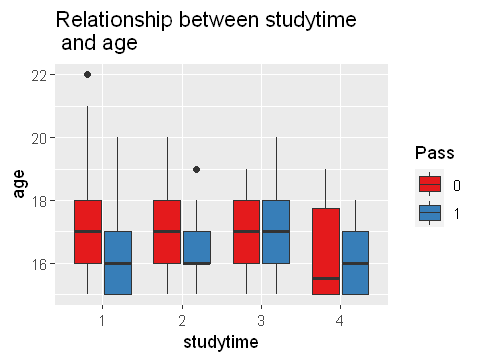

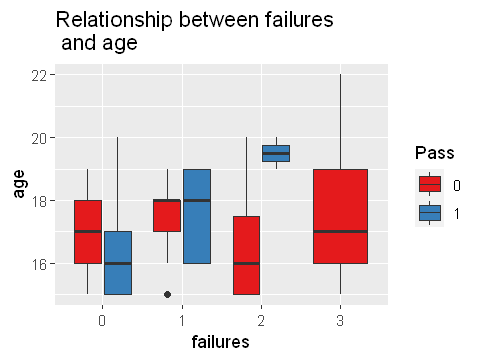

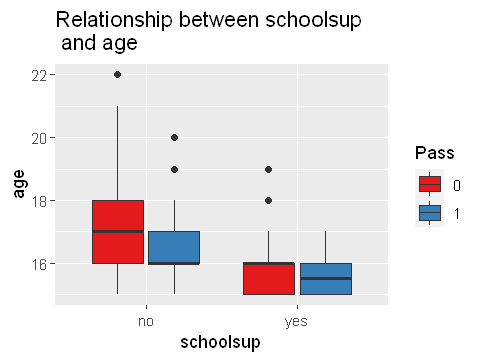

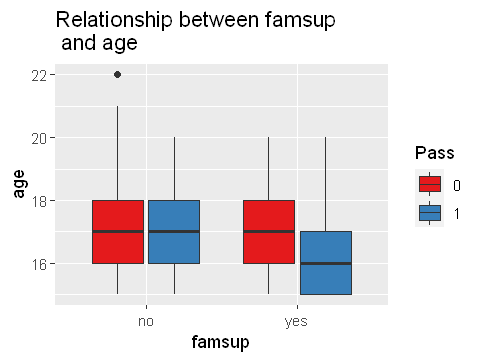

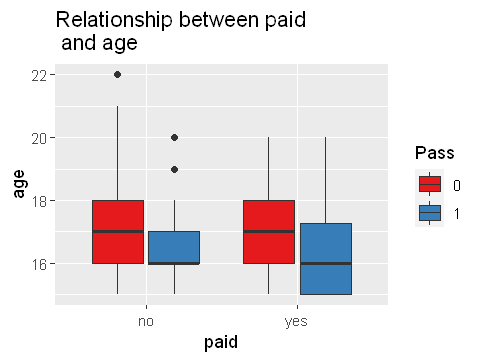

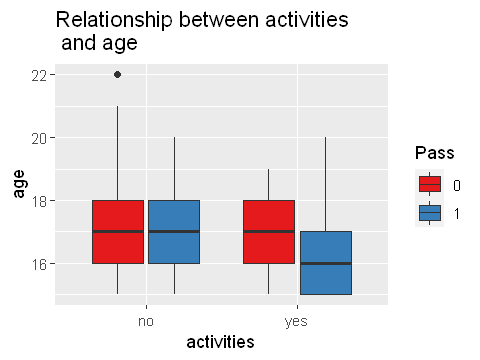

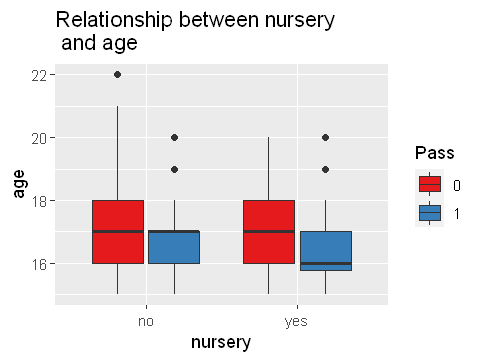

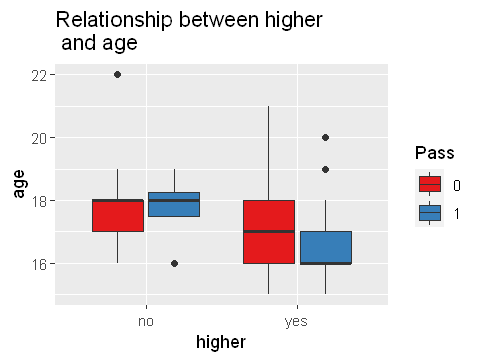

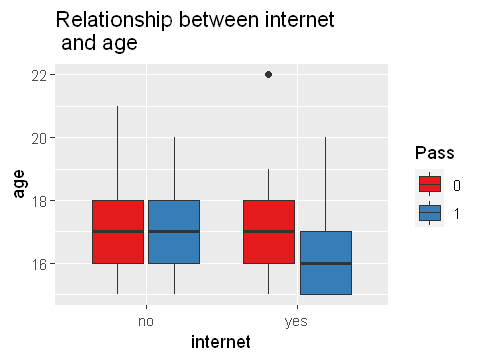

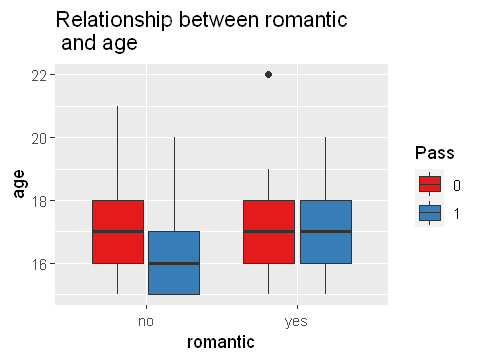

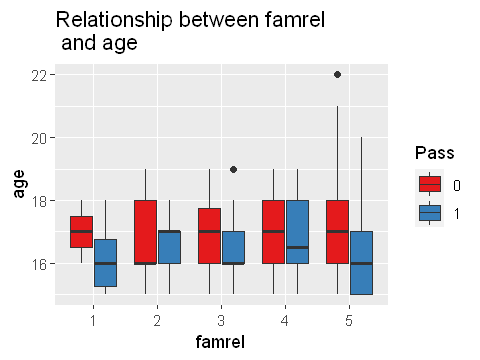

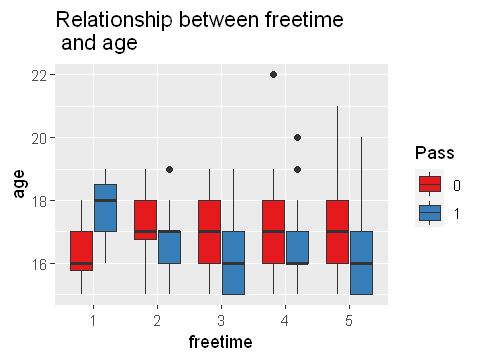

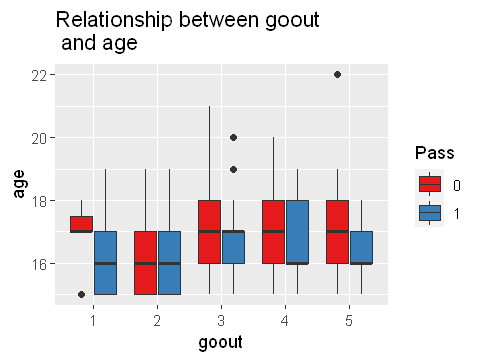

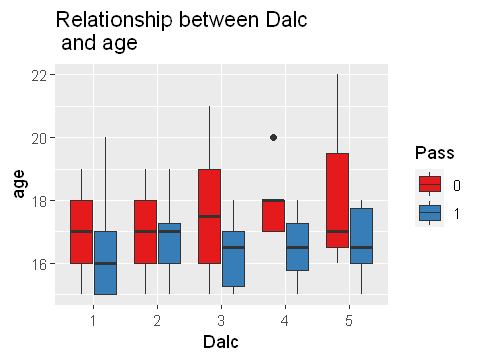

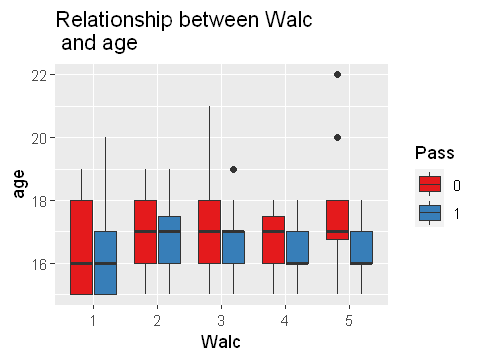

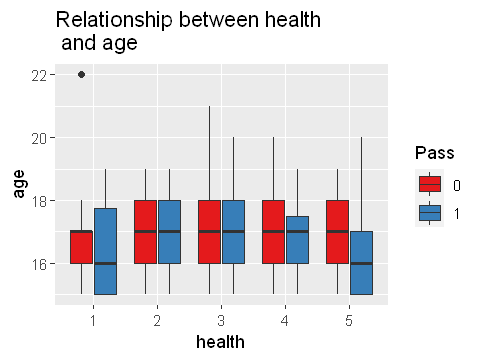

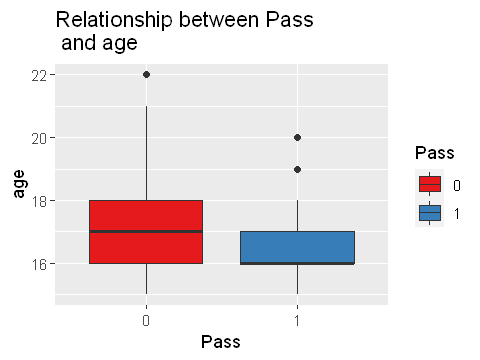

In [28]:
# using boxplots and putting age in y axis
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
         'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Pass')
plot_box = function(df, col, col_y = 'age'){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(x = col, y = col_y, fill = 'Pass')) + 
            geom_boxplot() +    
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Relationship between', col, '\n and', col_y))
        print(p)
    }
}


plot_box(student_grades, cols) 

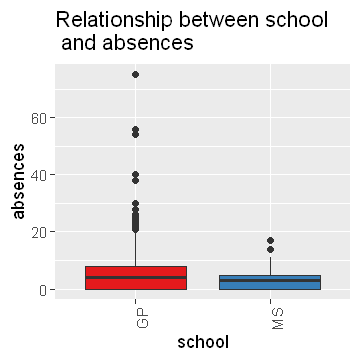

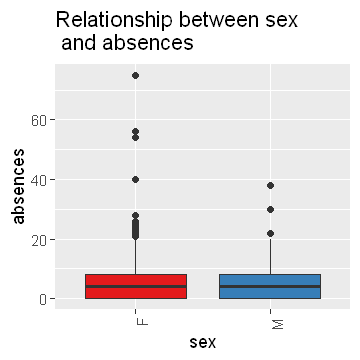

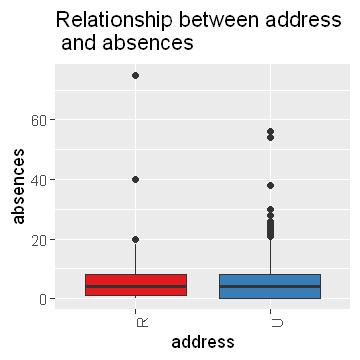

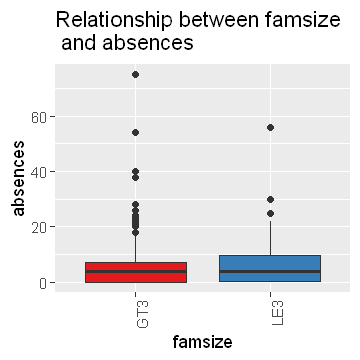

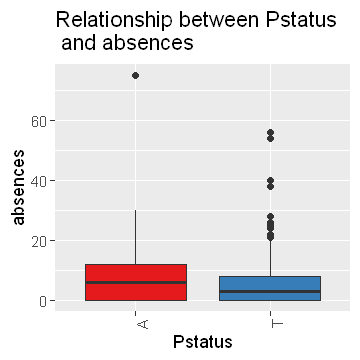

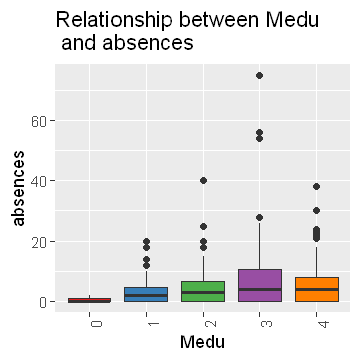

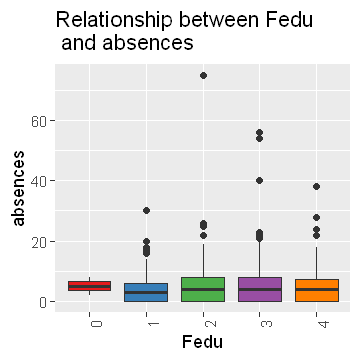

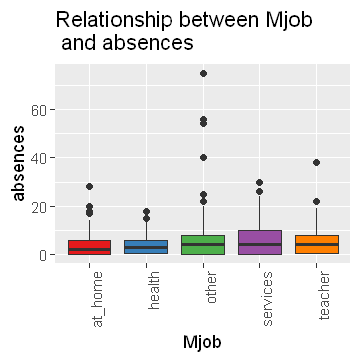

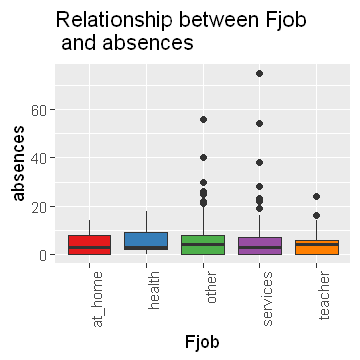

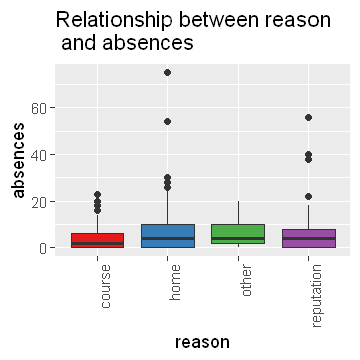

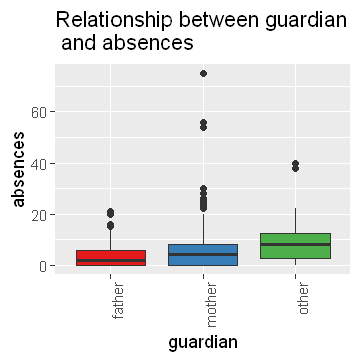

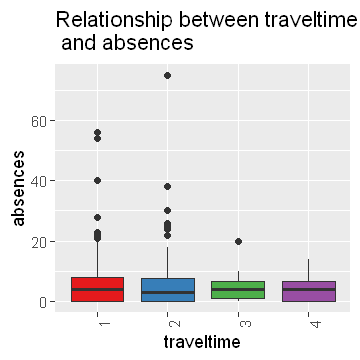

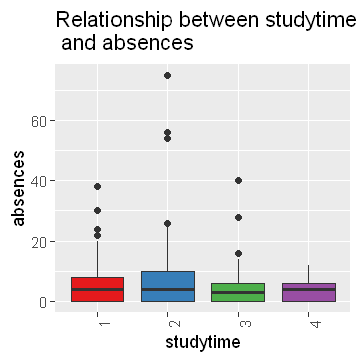

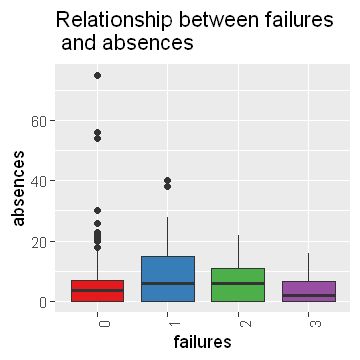

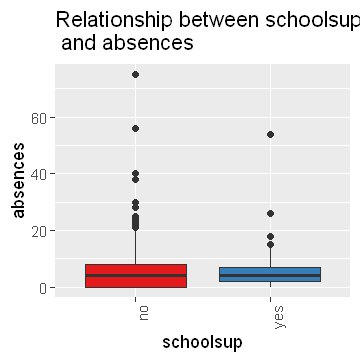

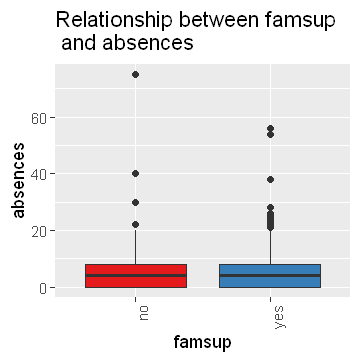

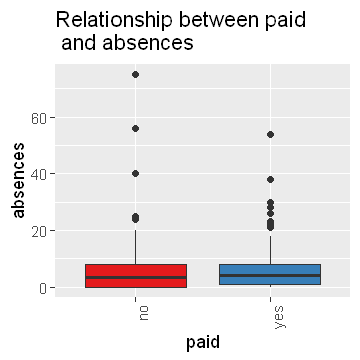

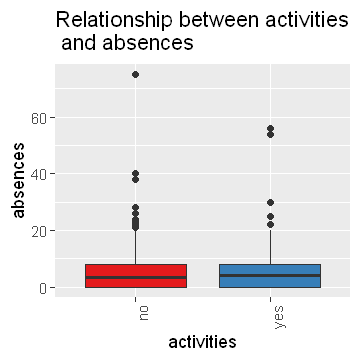

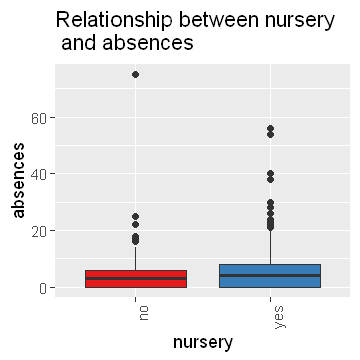

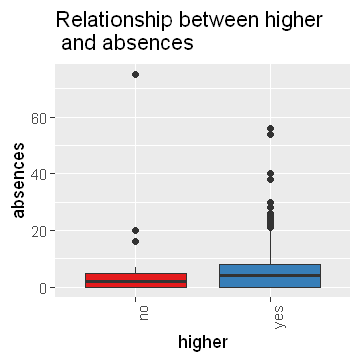

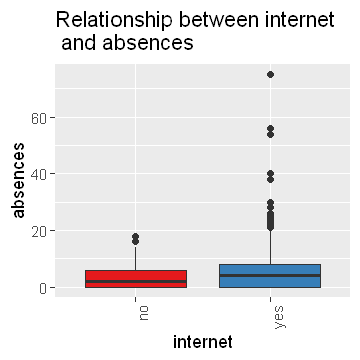

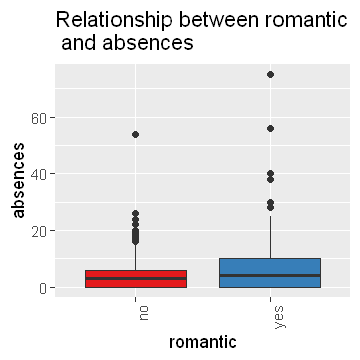

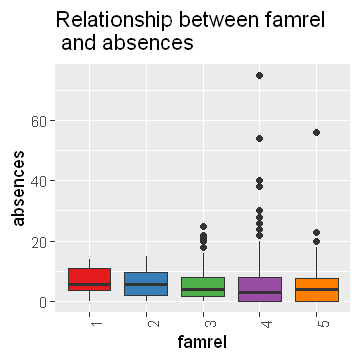

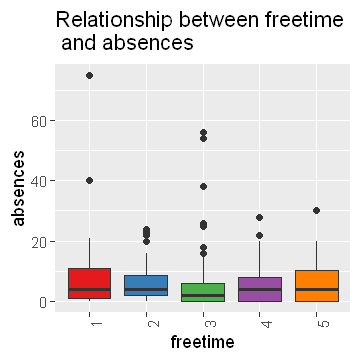

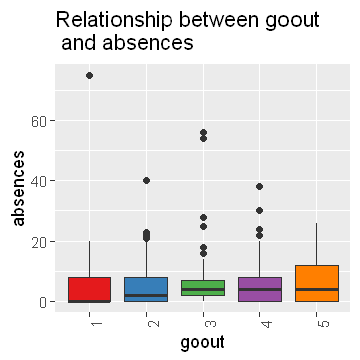

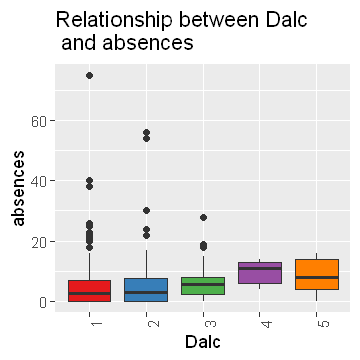

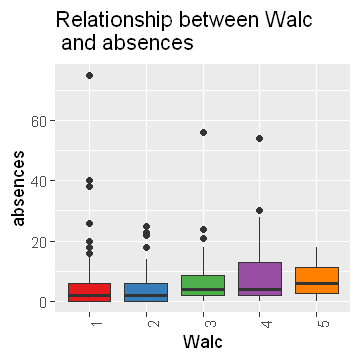

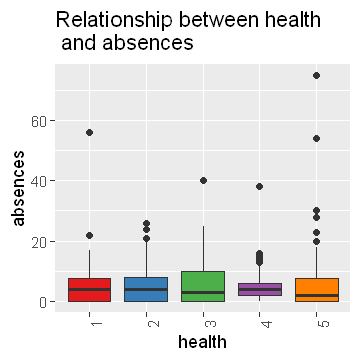

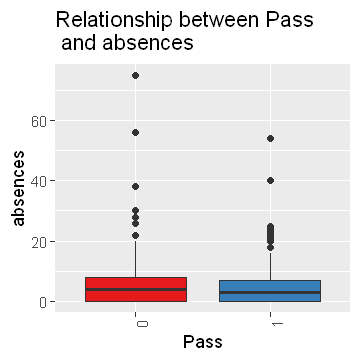

In [58]:
# using boxplots and putting absences in y axis
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
         'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Pass')
plot_box = function(df, col, col_y = 'absences'){
    options(repr.plot.width=3, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(x = col, y = col_y, fill = col)) + 
            geom_boxplot() + 
            scale_fill_brewer(palette = 'Set1') +
            theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = 'none') +
            ggtitle(paste('Relationship between', col, '\n and', col_y))
        print(p)
    }
}


plot_box(student_grades, cols) 

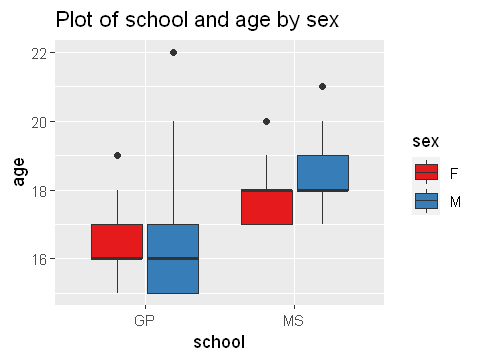

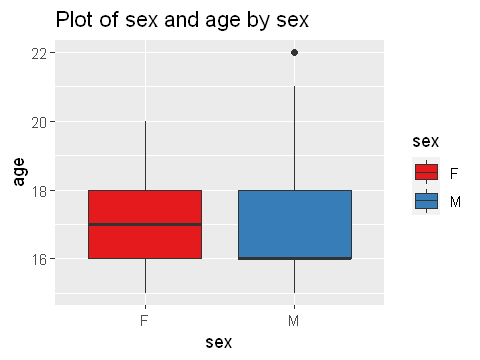

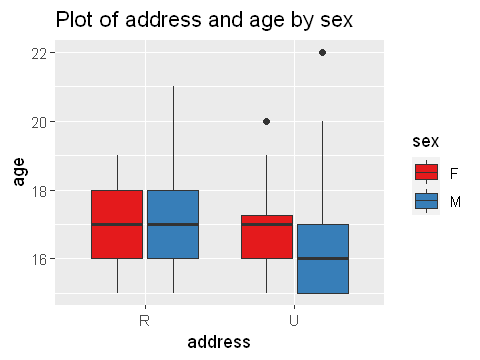

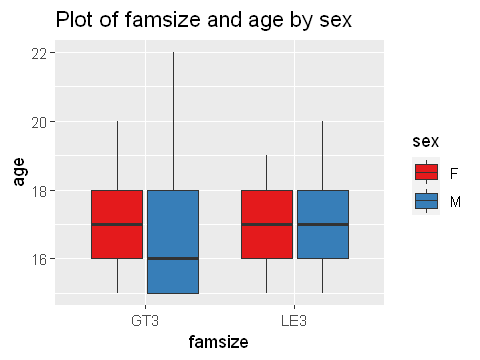

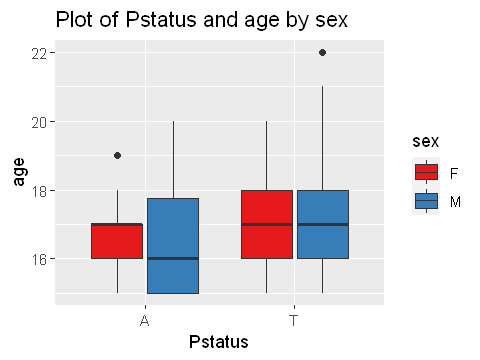

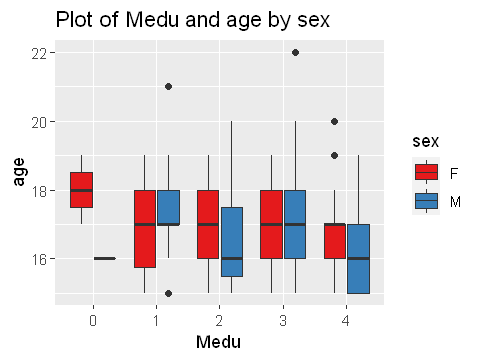

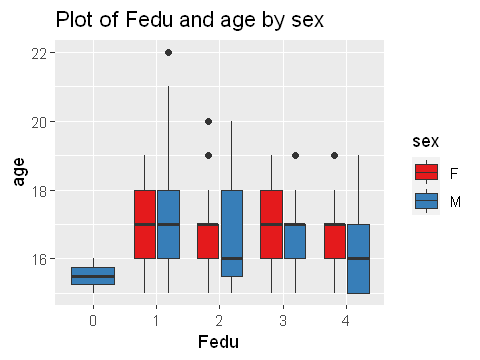

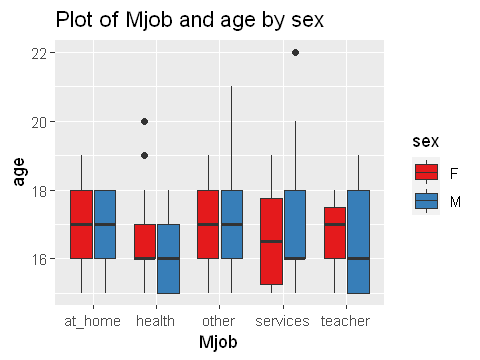

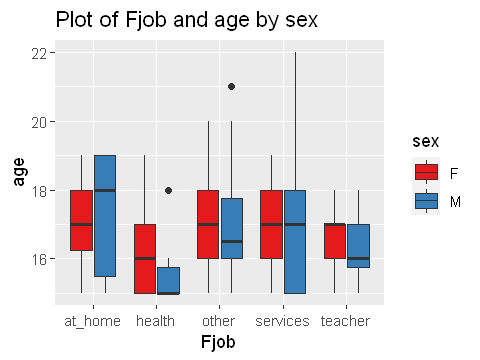

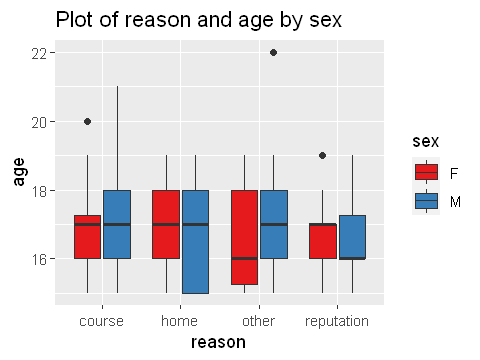

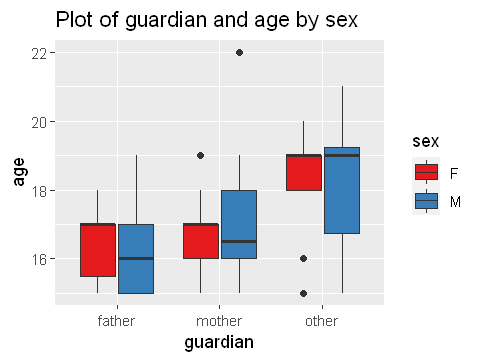

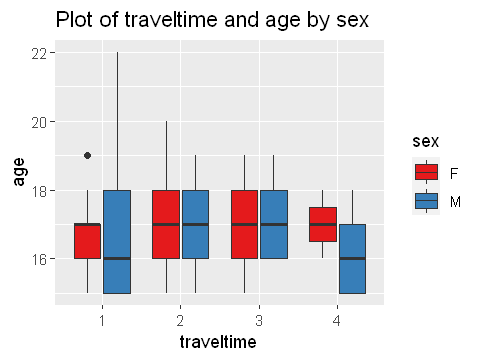

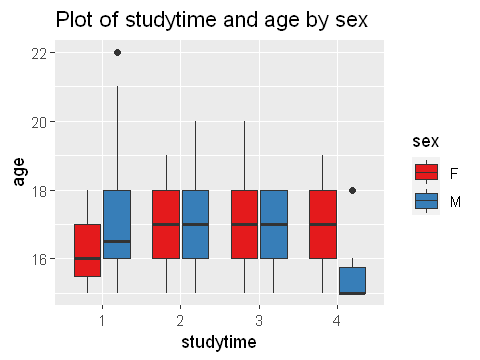

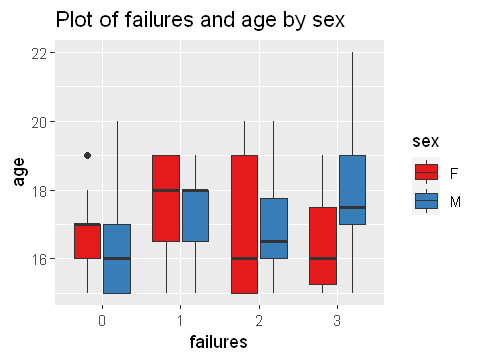

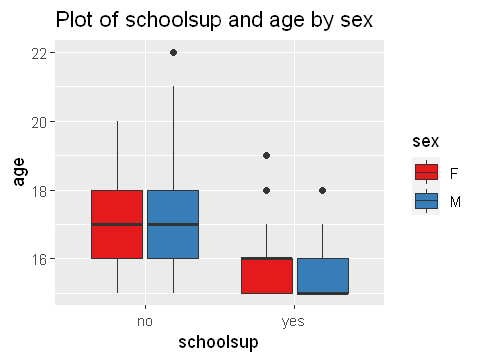

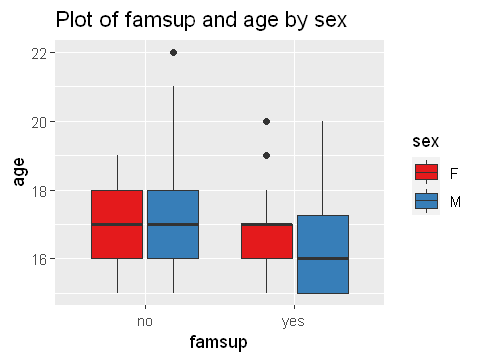

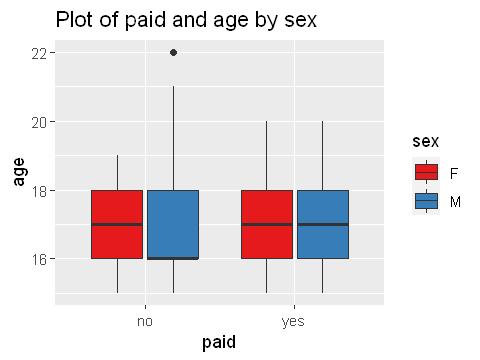

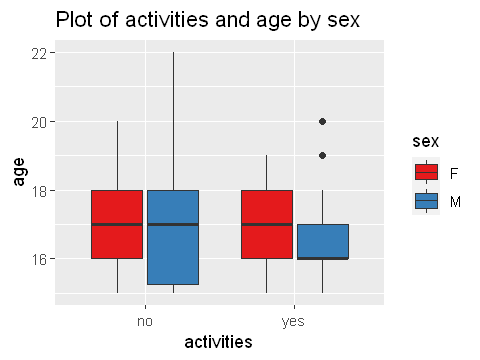

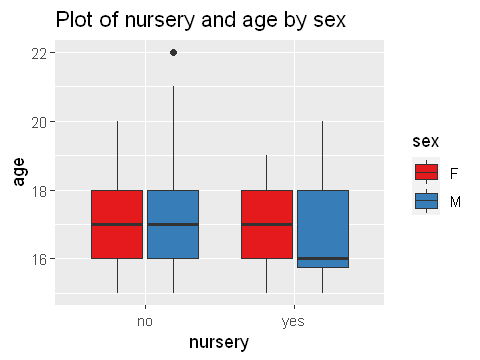

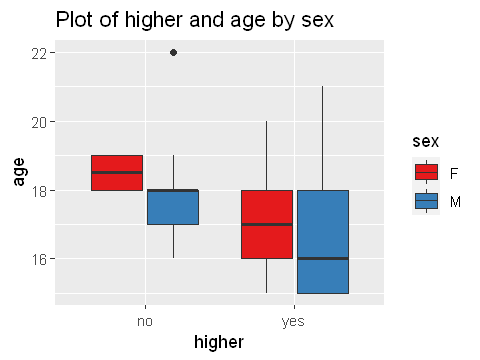

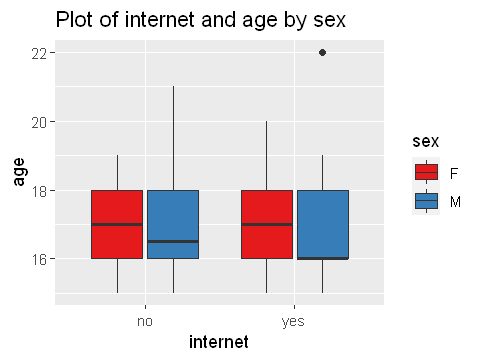

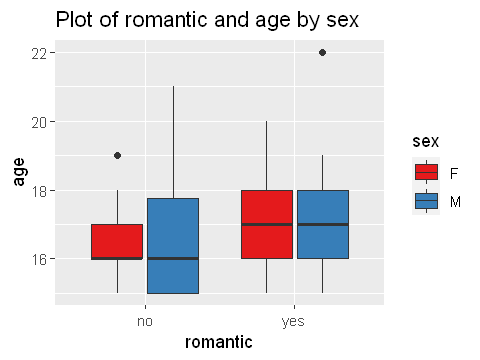

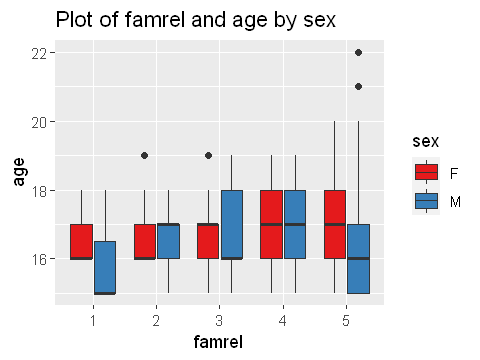

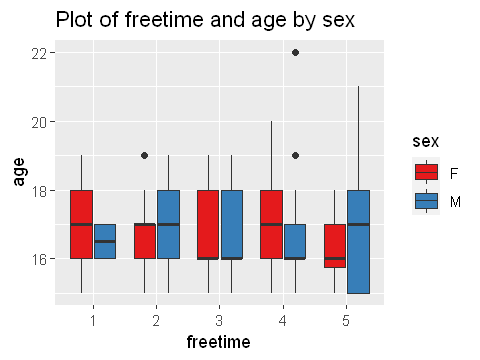

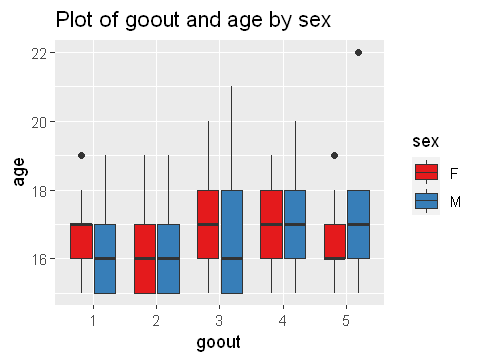

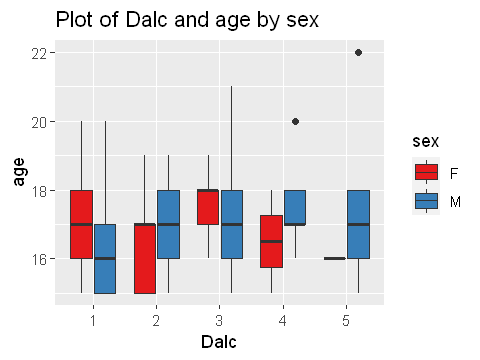

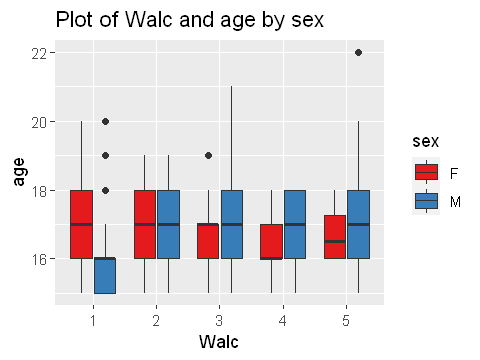

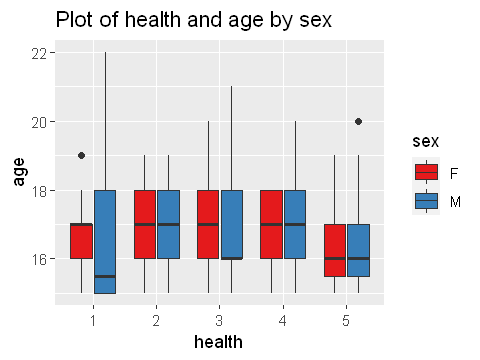

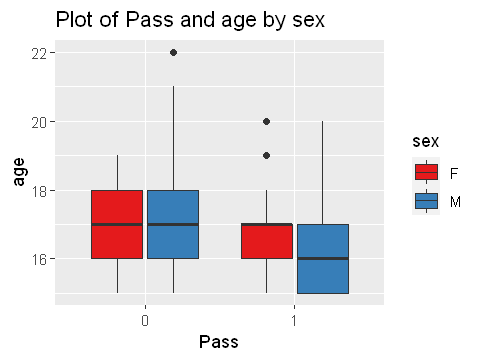

In [66]:
# using boxplots and putting age in y axis
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
         'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Pass')
plot_box = function(df, col, col_y = 'age'){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(x = col, y = col_y, fill = 'sex')) + 
            geom_boxplot() +    
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Plot of', col, 'and', col_y, 'by sex'))
        print(p)
    }
}


plot_box(student_grades, cols) 

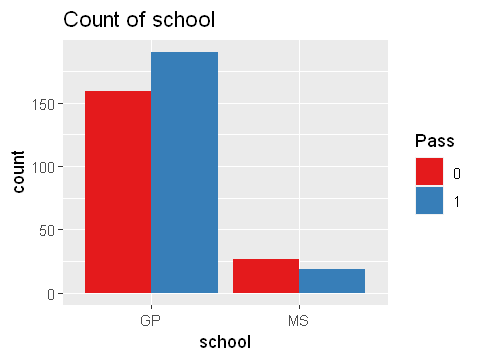

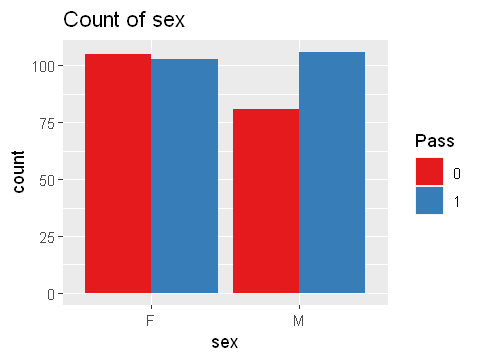

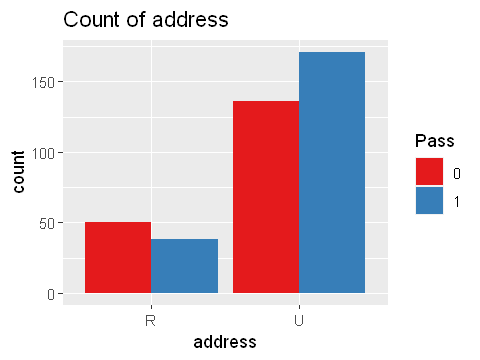

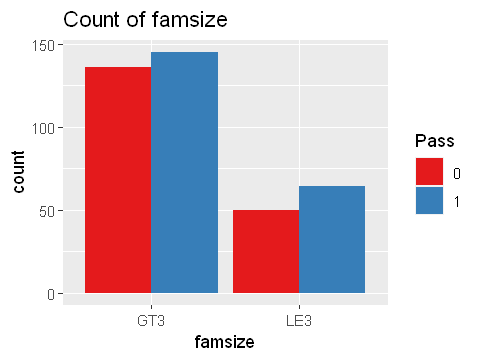

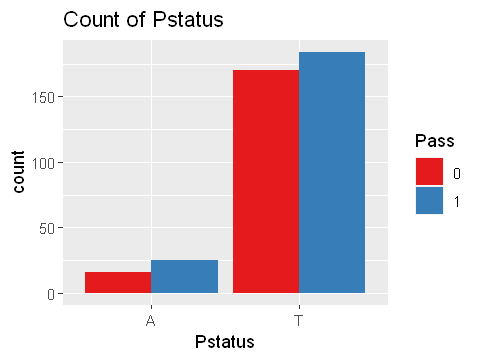

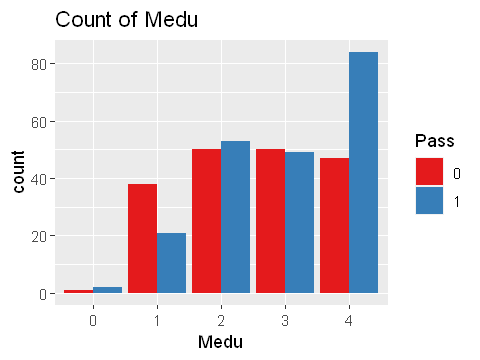

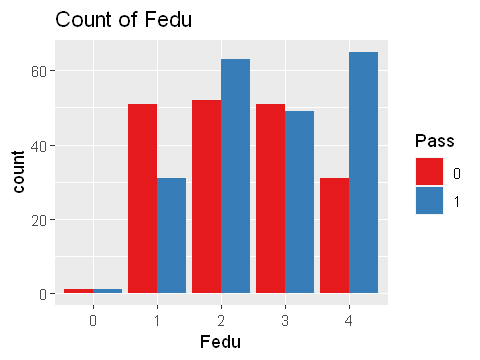

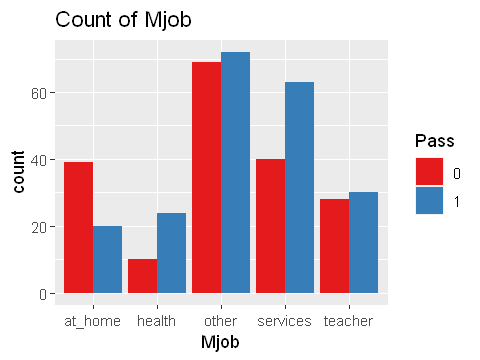

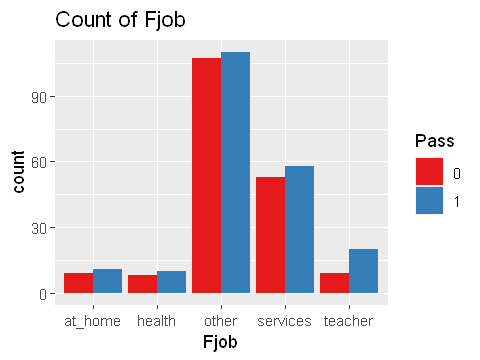

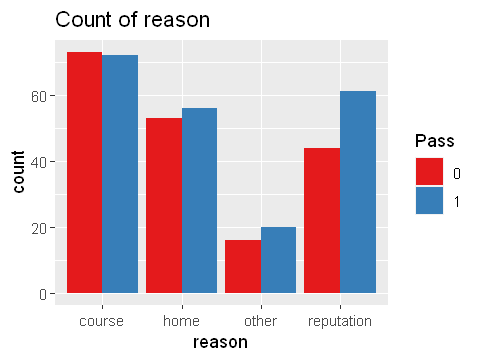

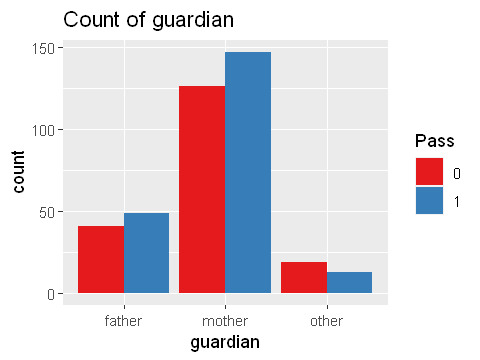

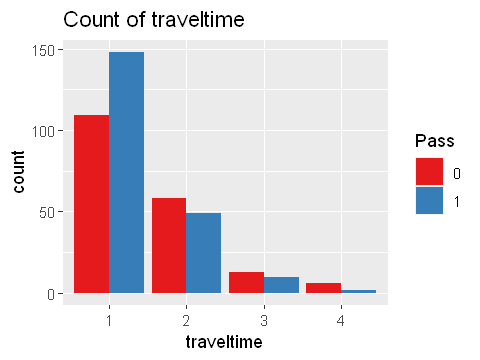

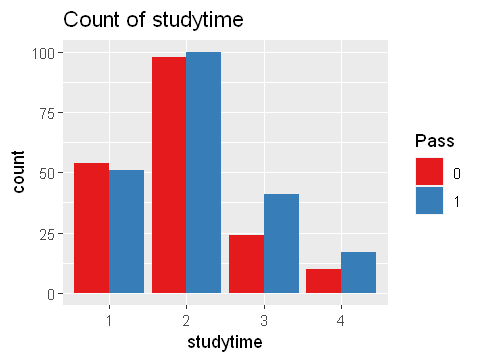

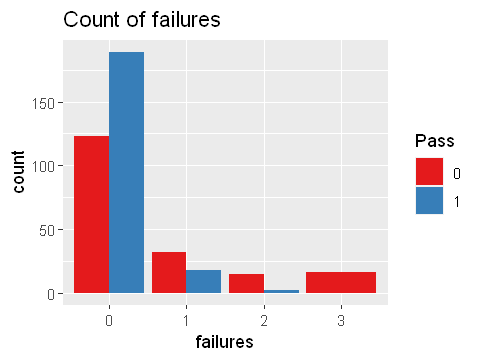

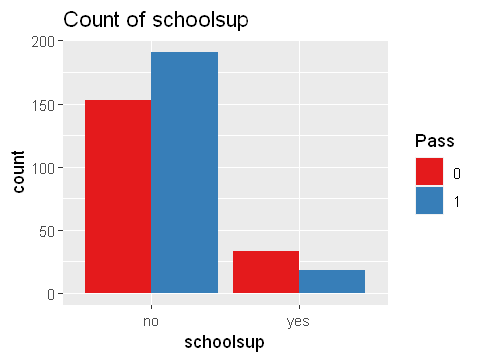

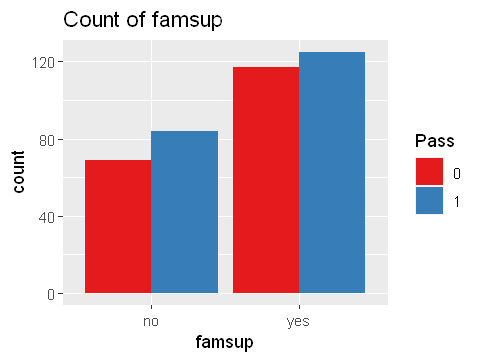

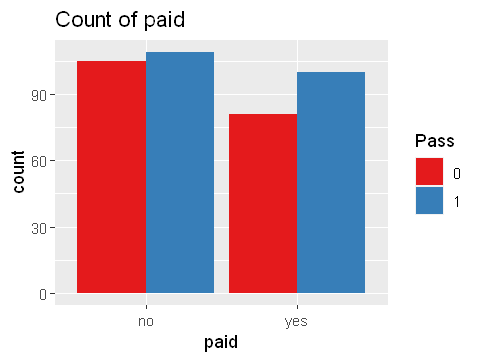

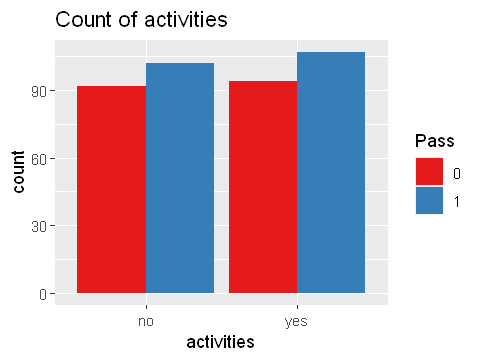

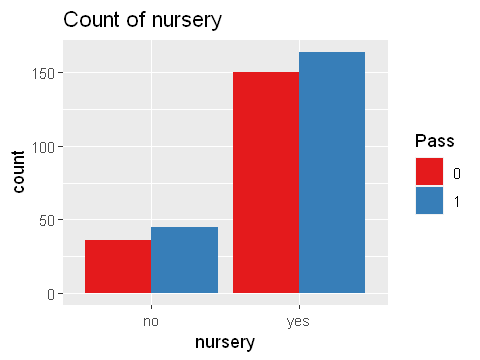

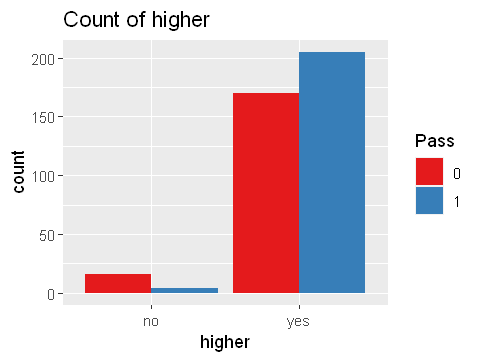

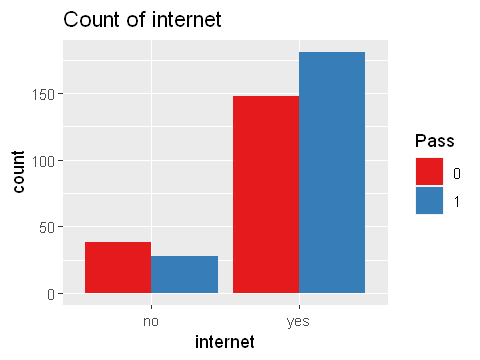

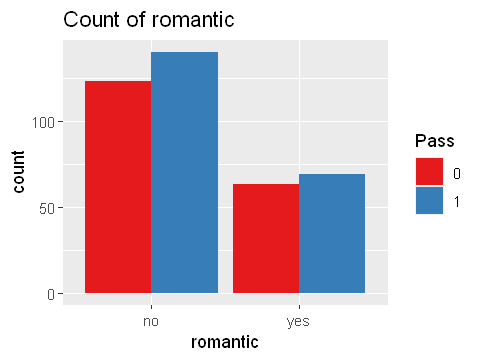

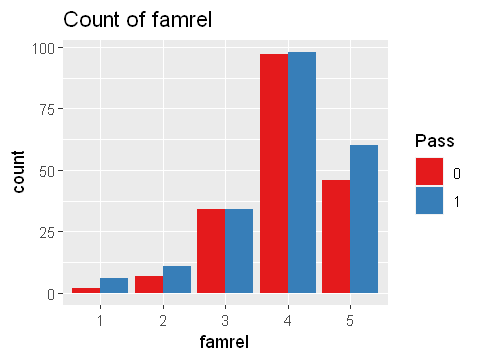

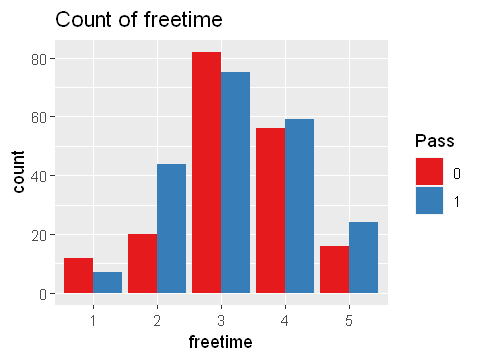

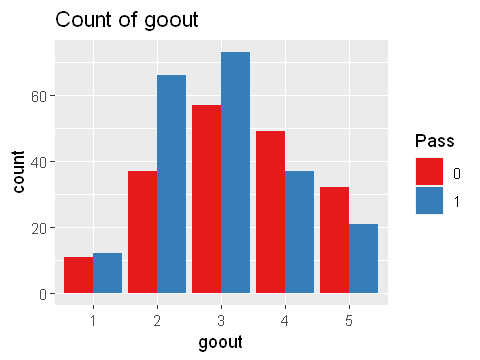

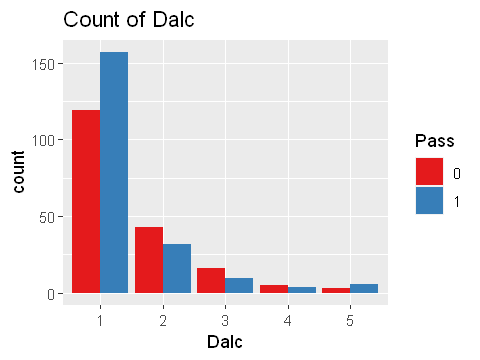

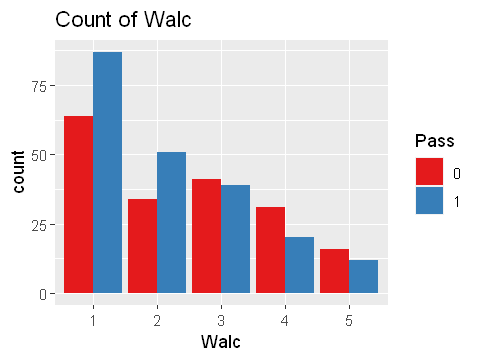

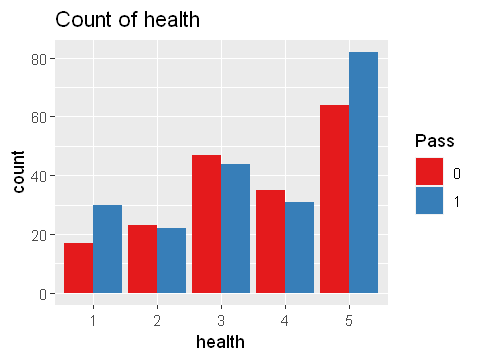

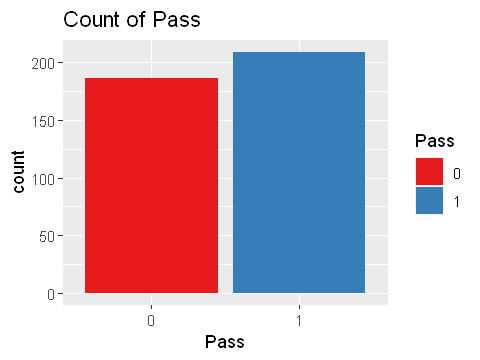

In [59]:
# Plotting all categorical features
cols = c('school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
         'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Pass')
plot_box = function(df, col){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(x = col, fill = 'Pass')) + 
            geom_bar(position="dodge") +    
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Count of', col))
        print(p)
    }
}


plot_box(student_grades, cols)

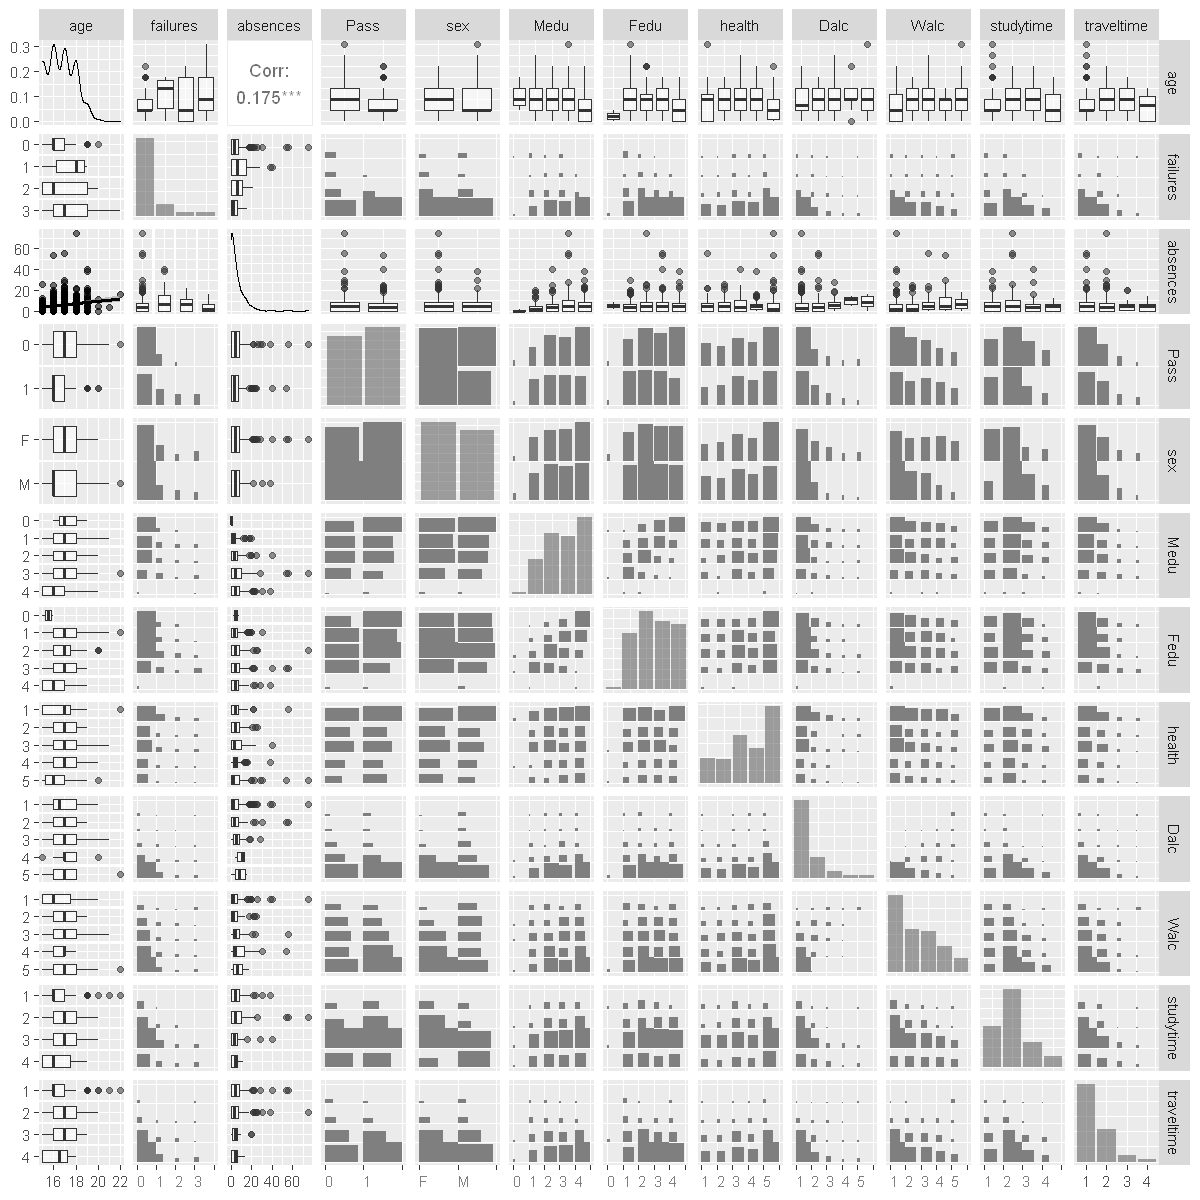

In [39]:
numcols = c('age', 'failures', 'absences', 'Pass', 'sex', 'Medu', 'Fedu', 'health', 'Dalc', 'Walc', 'studytime',
            'traveltime')
options(repr.plot.width=10, repr.plot.height=10)
ggpairs(student_grades, columns = numcols, aes(alpha = 0.1), upper = list(continuous = "cor", combo = "box_no_facet", 
    discrete = 'ratio'), lower = list(continuous = "smooth", combo = "box", discrete = 'ratio'))

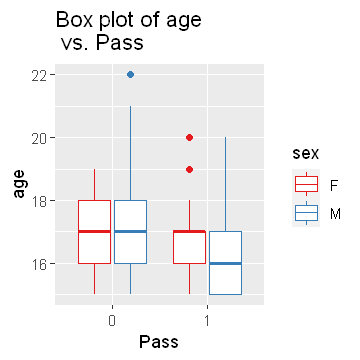

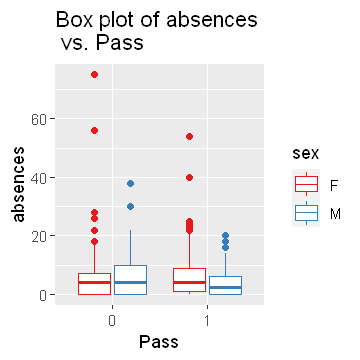

In [80]:
# visualize the class seperation on the numerical columns
num_cols = c('age', 'absences')
plot_box = function(df, col, col_x = 'Pass'){
    options(repr.plot.width=3, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in num_cols){
        p = ggplot(df, aes_string(col_x, col, color = 'sex')) + 
                   geom_boxplot() +
                    scale_colour_brewer(palette = 'Set1') +
                   ggtitle(paste('Box plot of', col, '\n vs.', col_x))
        print(p)
    }
}


plot_box(student_grades, num_cols) 

There is a useful seperation of classes within the 'age' and 'absences' and 'failures' variables. The median age of females that pass is 17 while that of males is 16. This could mean that younger males do better than older males. Number of previous failures is another important factor to the Pass label.

Another observation is the presence of outliers in the absences, failures and age variables.

In [44]:
str(student_grades)

'data.frame':	395 obs. of  31 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ Fedu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: Factor w/ 4 levels "1","2","3","4": 2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : Factor w/ 4 levels "1","2","3","4": 2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid   

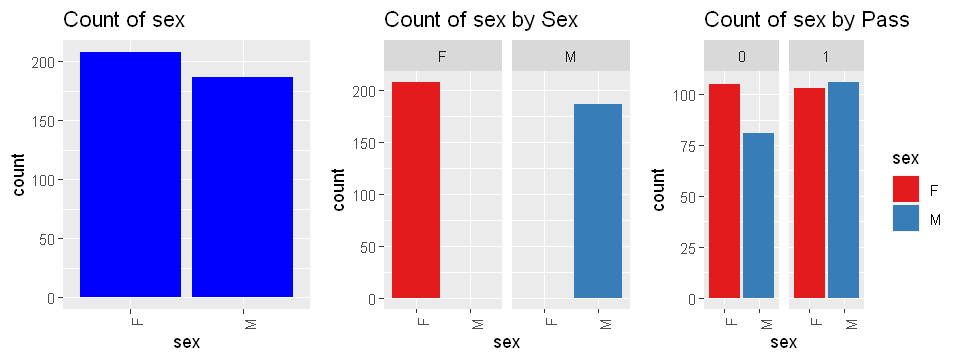

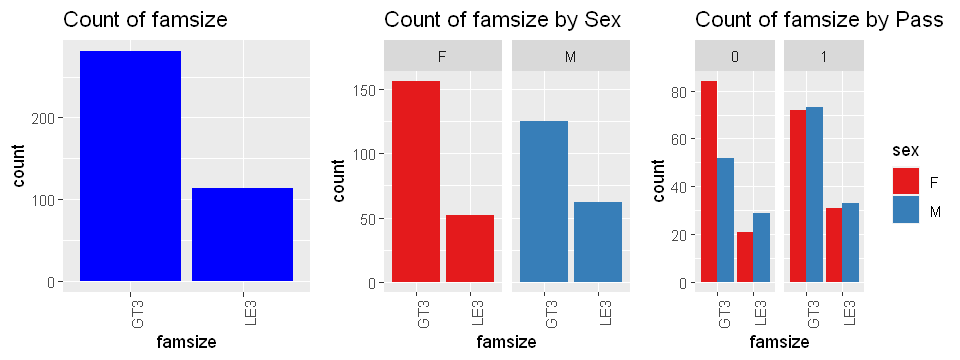

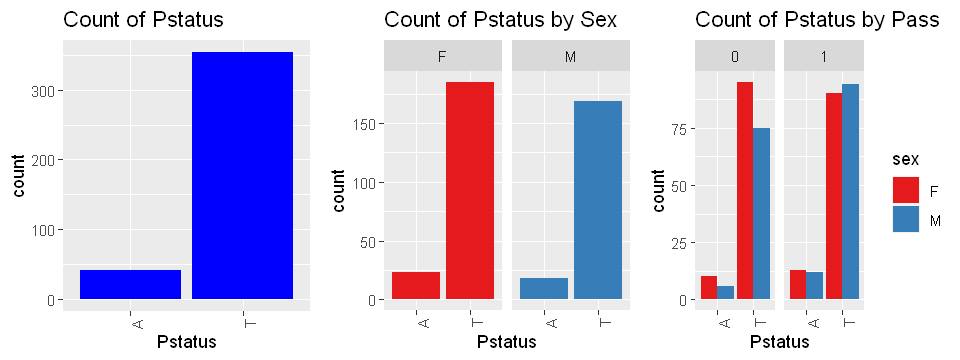

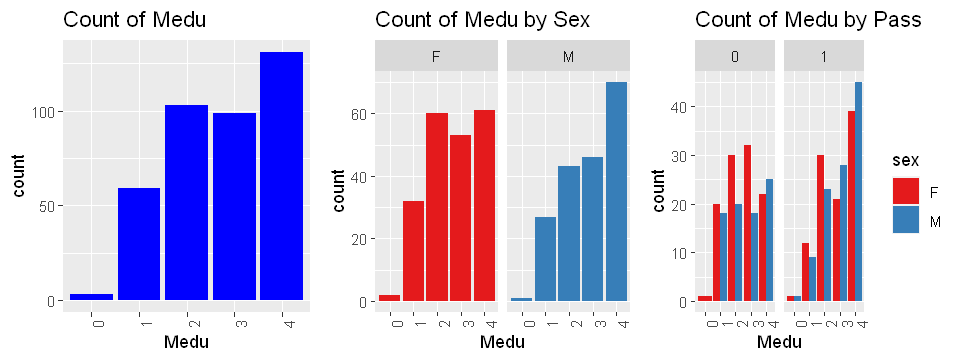

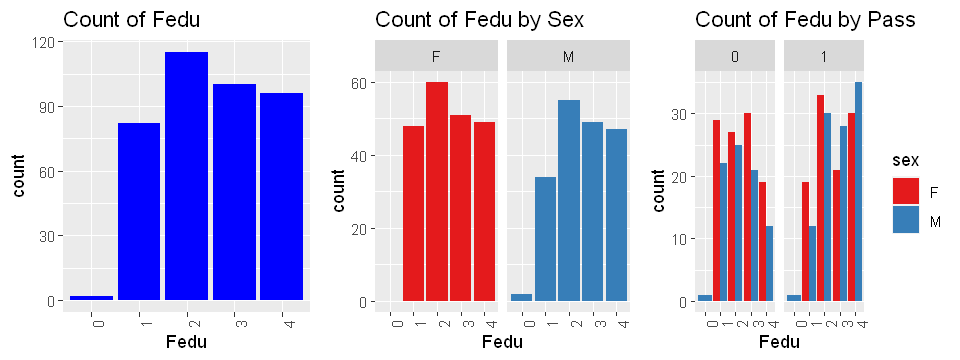

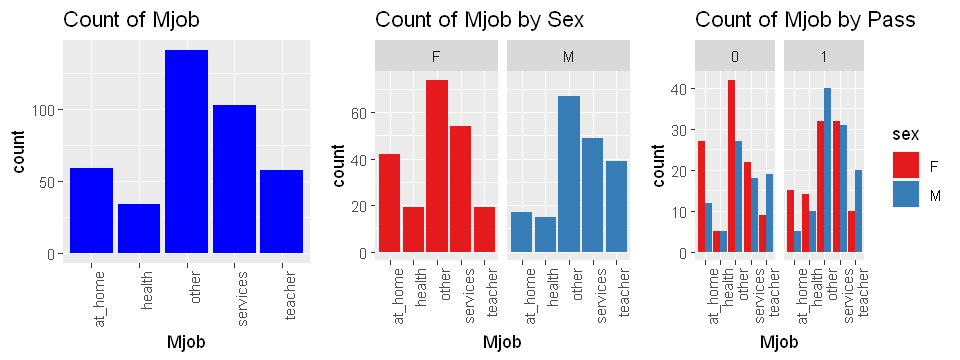

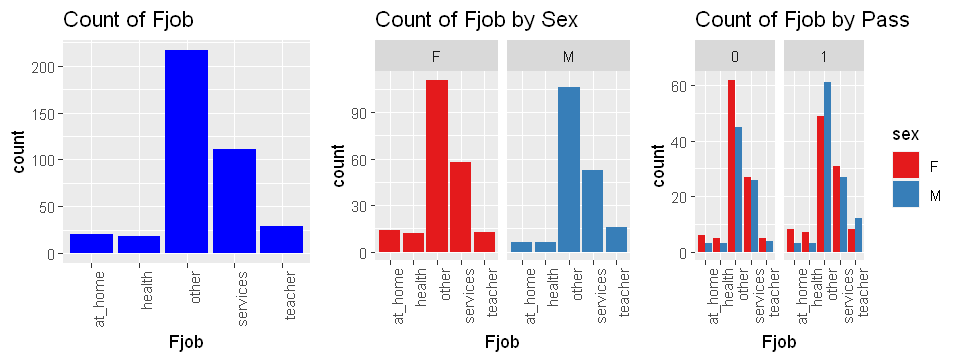

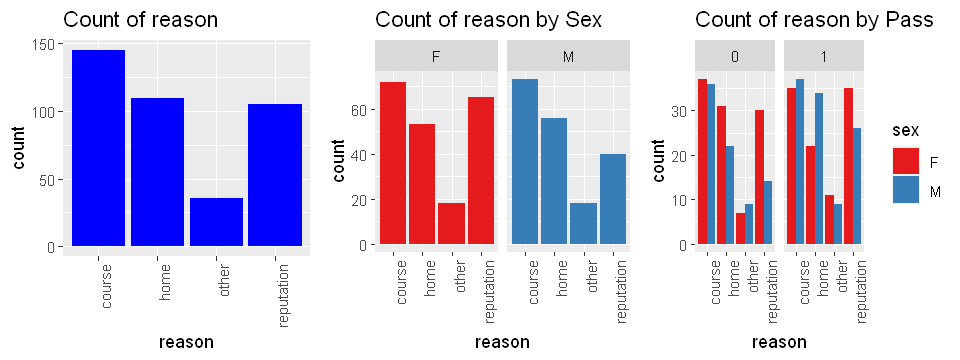

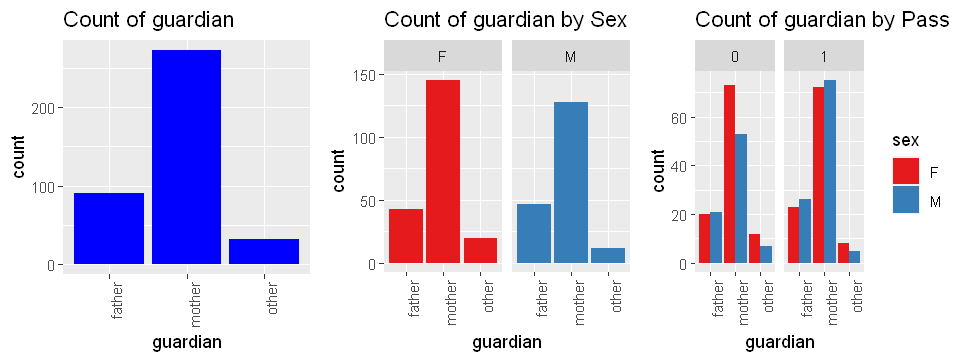

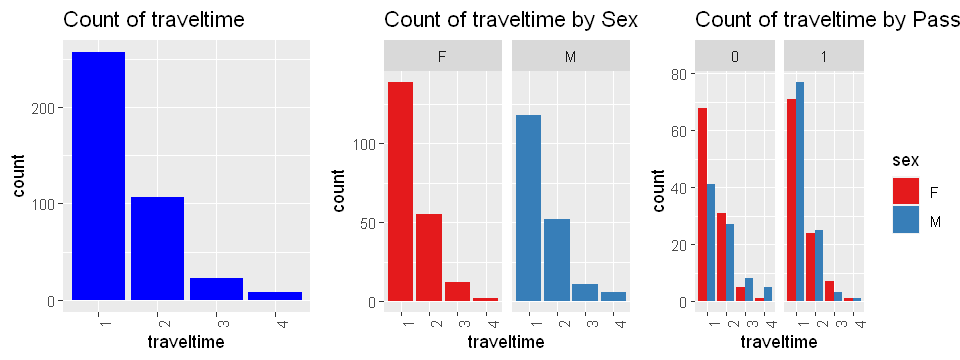

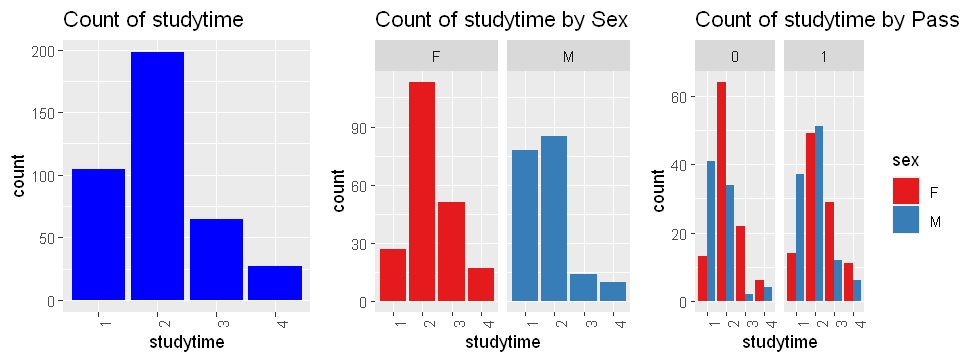

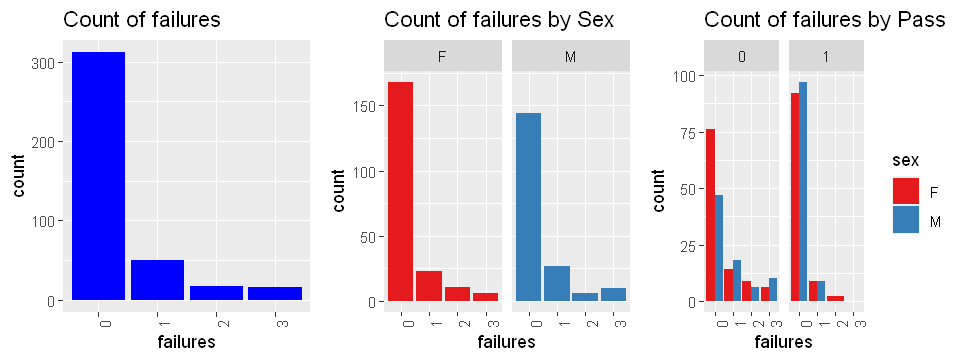

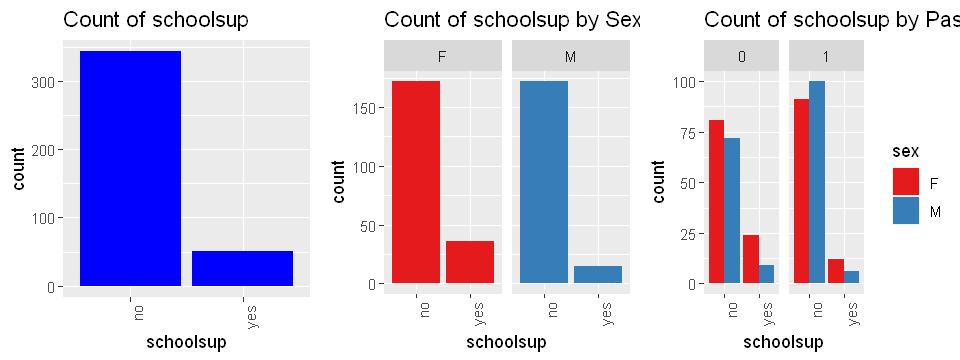

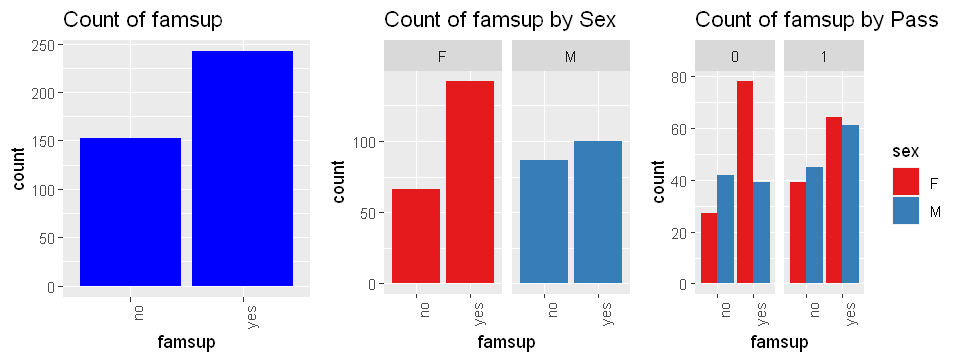

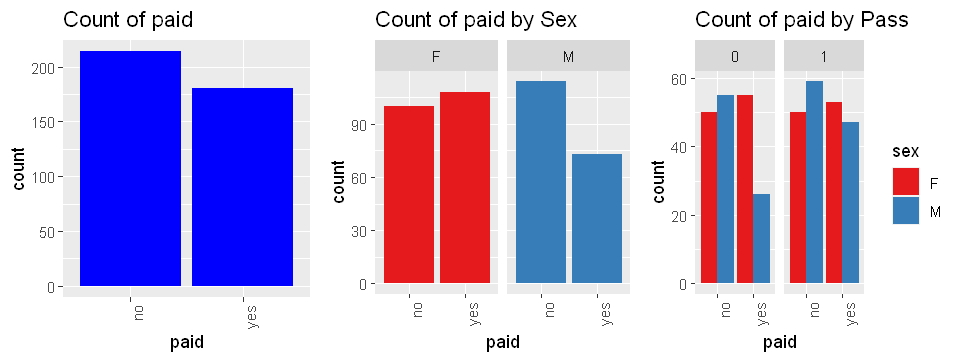

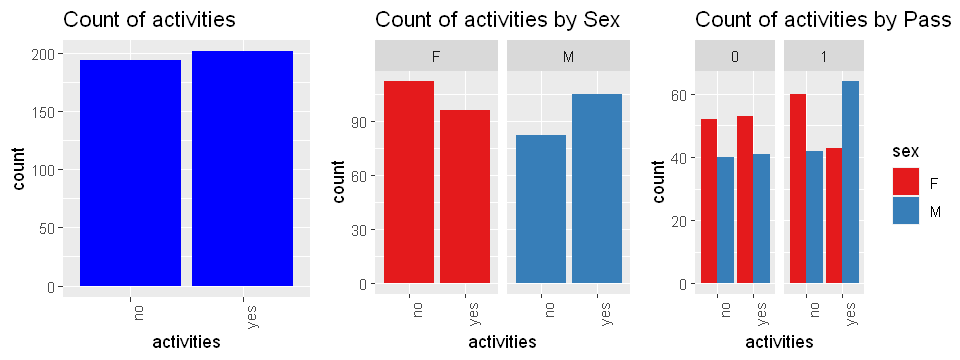

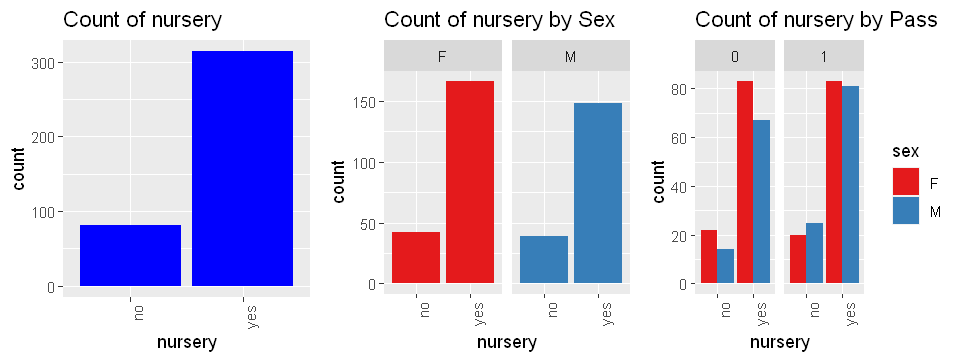

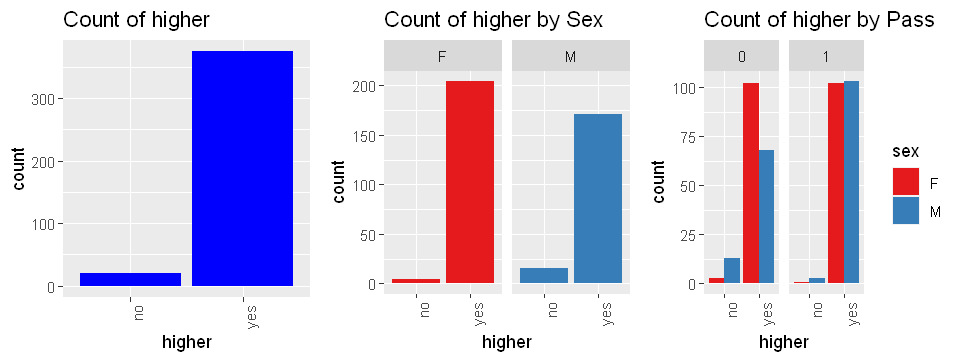

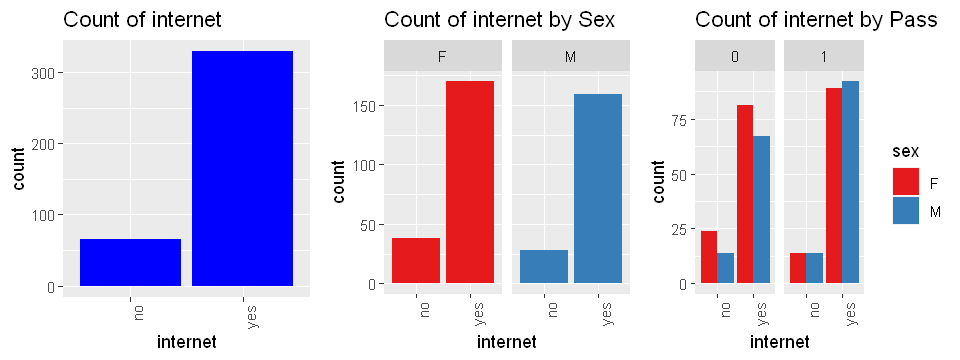

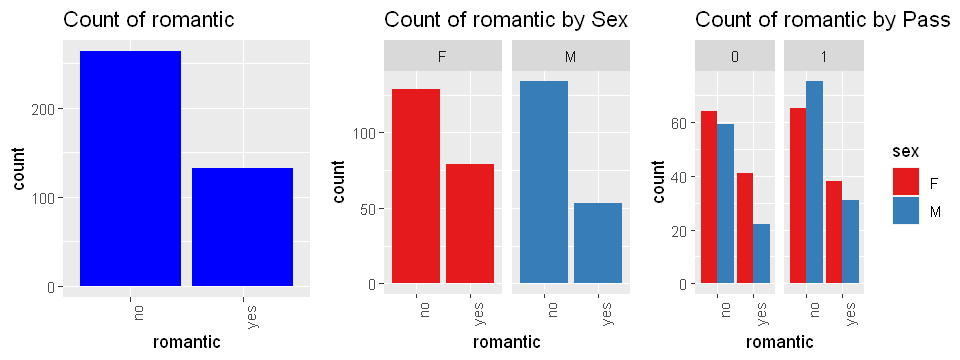

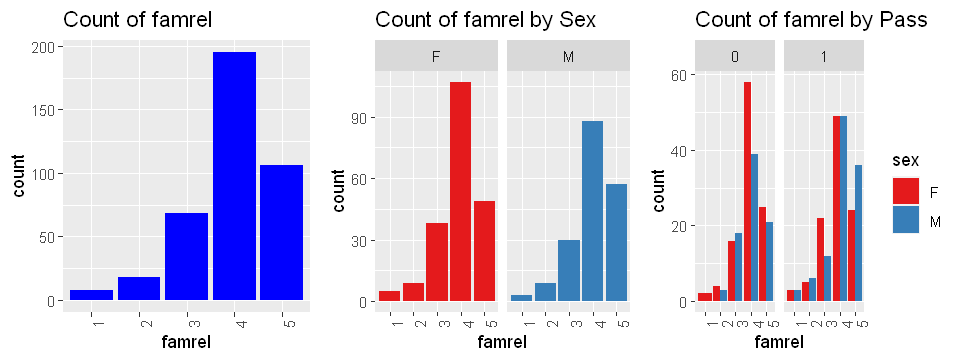

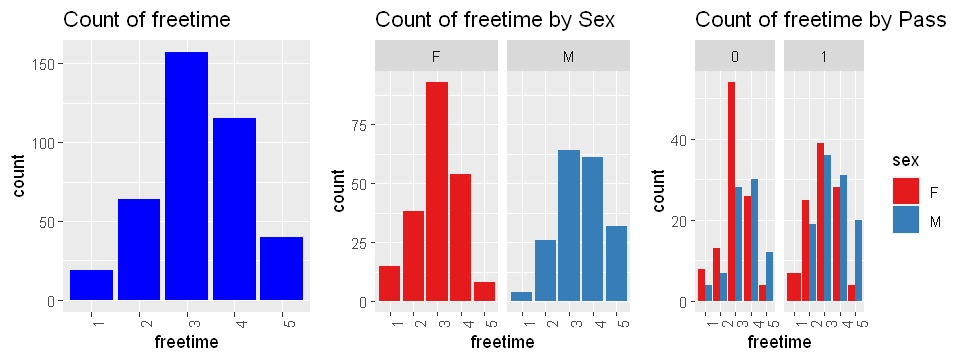

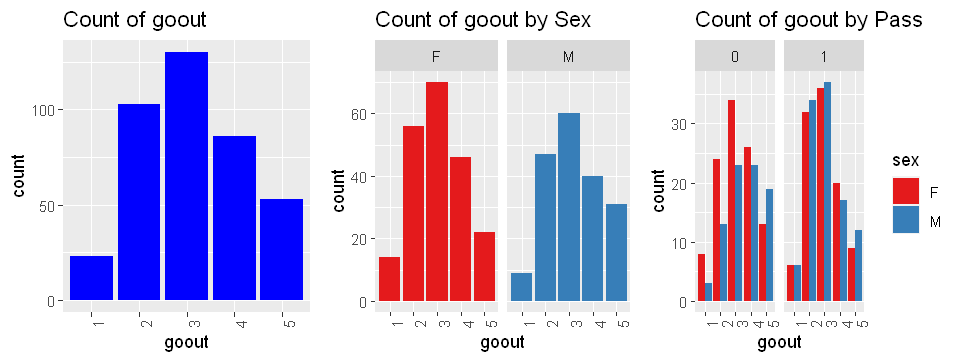

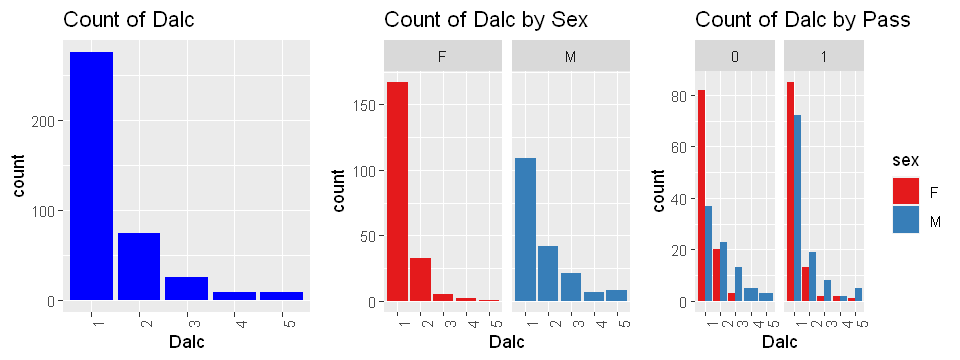

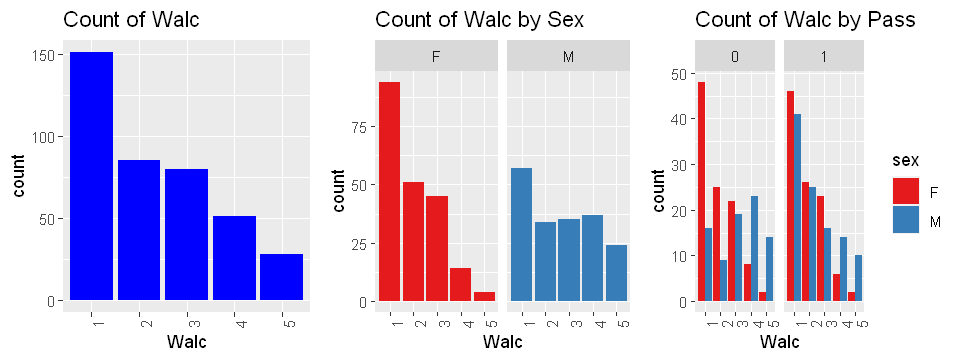

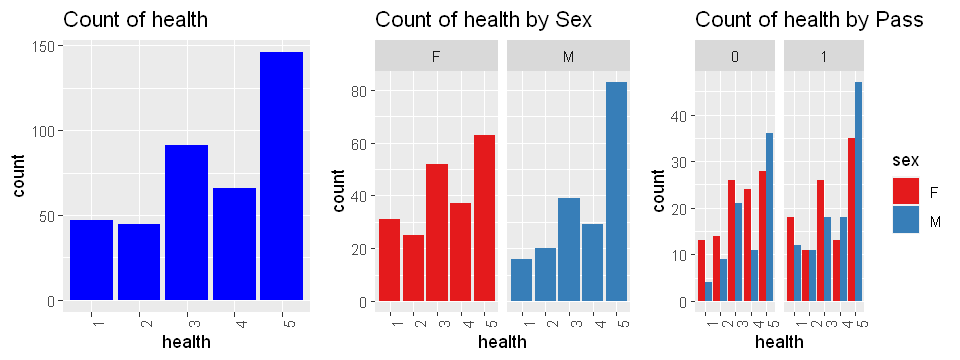

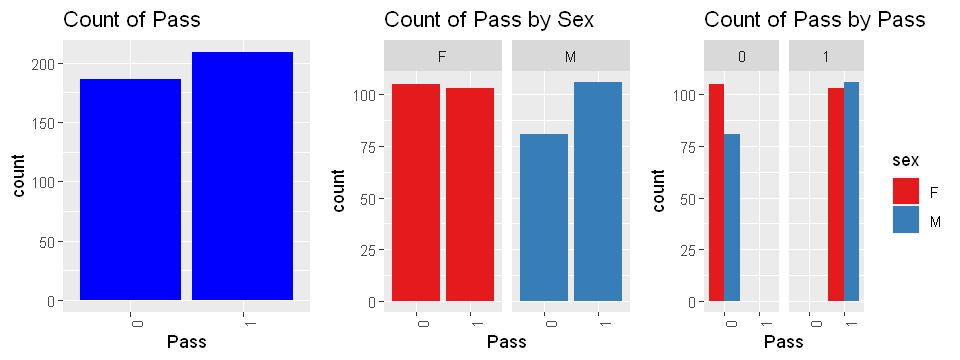

In [71]:
cols = c( 'sex', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
         'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Pass')
plot_box = function(df, col){
    options(repr.plot.width=8, repr.plot.height=3) # Set the initial plot area dimensions
    for(col in cols){
        p1 = ggplot(df, aes_string(x = col)) + 
            geom_bar(position="dodge", fill = 'blue') + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            ggtitle(paste('Count of', col))
        
        p2 = ggplot(df, aes_string(x = col, fill = 'sex')) + 
            geom_bar(position="dodge") +
            facet_wrap(~sex) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = 'none') +
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Count of', col, 'by Sex'))
        
        p3 = ggplot(df, aes_string(x = col, fill = 'sex')) + 
            geom_bar(position="dodge") +
            facet_wrap(~Pass) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            scale_fill_brewer(palette = 'Set1') +
            ggtitle(paste('Count of', col, 'by Pass'))
        grid.arrange(p1,p2,p3, nrow = 1)
        
    }
}

plot_box(student_grades, cols)

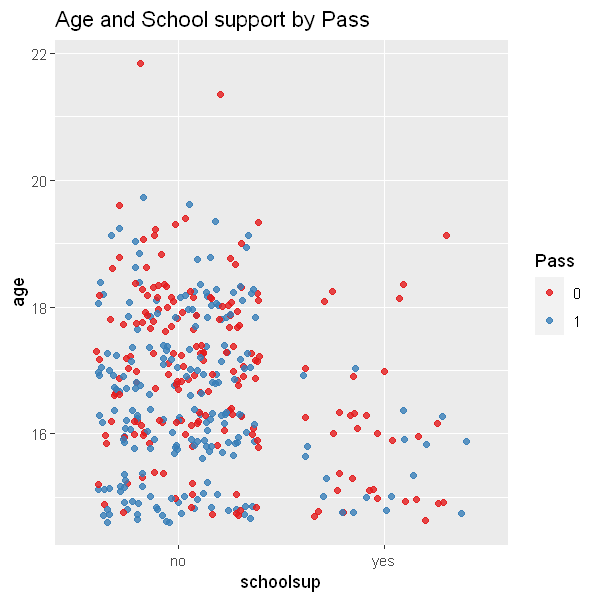

In [89]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(student_grades, aes(y = age, x = schoolsup, color = Pass))+
geom_jitter(alpha = 0.8) +
scale_color_brewer(palette = 'Set1') +
labs(title = 'Age and School support by Pass')

Looking at absences and age

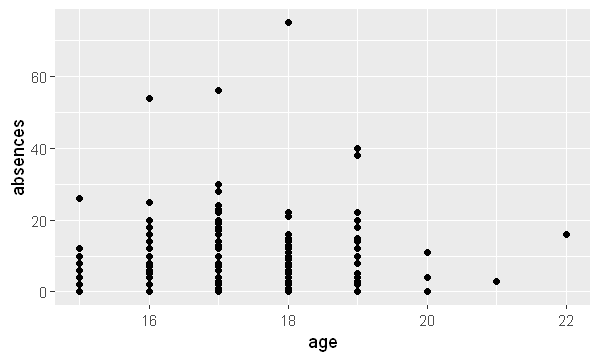

In [44]:
#Looking at absences and age
options(repr.plot.width=5, repr.plot.height=3)
ggplot(student_grades, aes(age, absences)) +
geom_point()

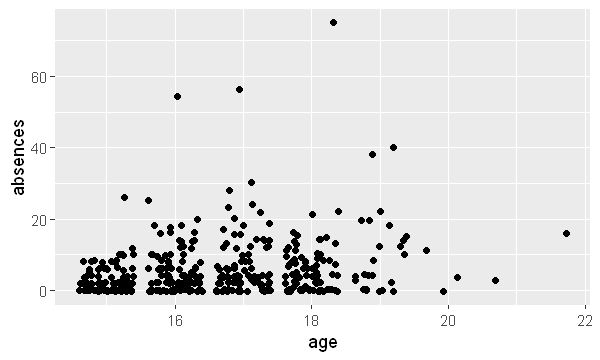

In [45]:
# using geom_jitter() to overcome overplotting
ggplot(student_grades, aes(age, absences)) +
geom_jitter()

Warning message:
"Using size for a discrete variable is not advised."

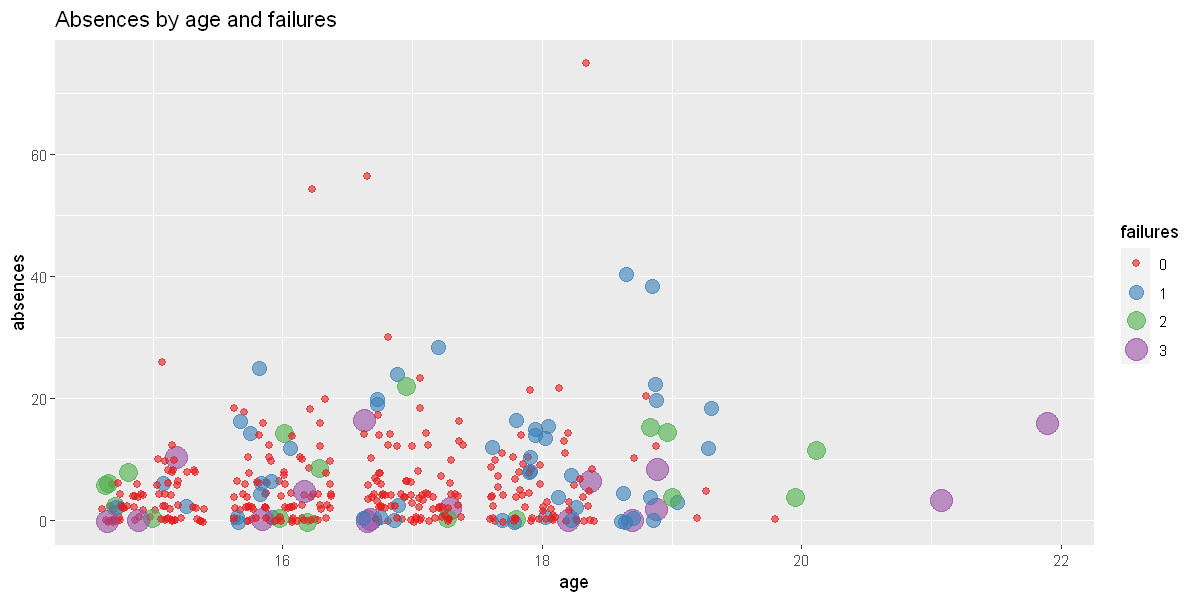

In [74]:
# add number of failures as a size aesthetic and alpha
options(repr.plot.width=10, repr.plot.height=5)
ggplot(student_grades, aes(age, absences, size = failures, color = failures)) +
geom_jitter(alpha = 0.6) +
scale_color_brewer(palette = 'Set1') +
labs(title = 'Absences by age and failures')

Warning message:
"Using size for a discrete variable is not advised."

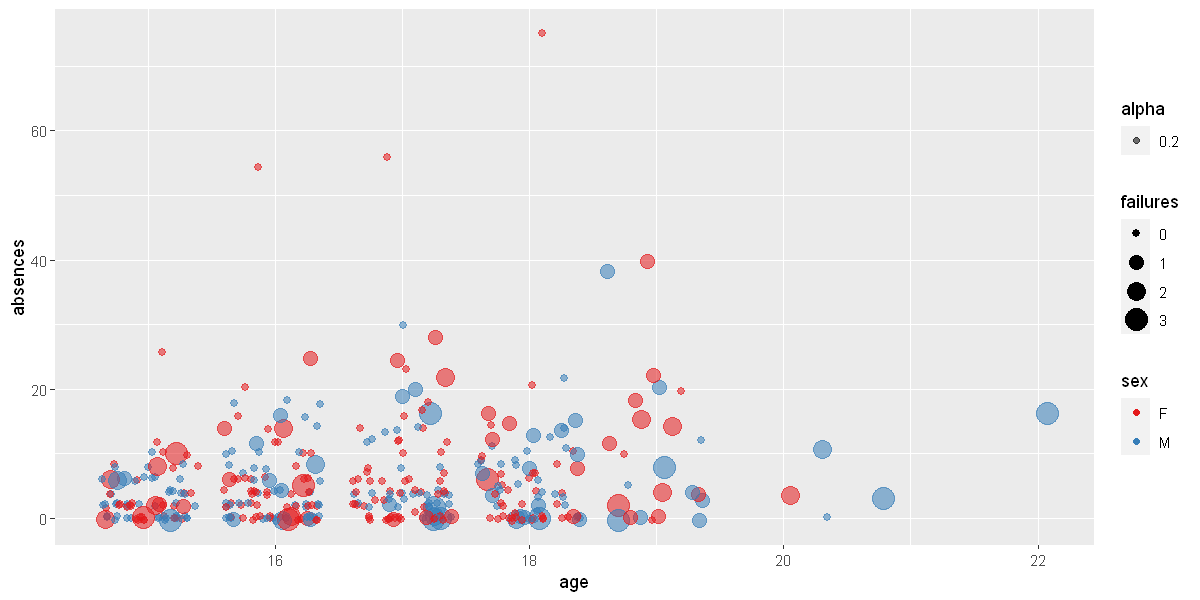

In [52]:
# using geom_jitter() and alpha = 0.2 to overcome overplotting
# adding a number of failures as a size aesthetic and sex as a shape aesthetic
ggplot(student_grades, aes(age, absences, size = failures, color = sex, alpha = 0.2)) +
scale_colour_brewer(palette = 'Set1') +
geom_jitter()

Warning message:
"Using size for a discrete variable is not advised."

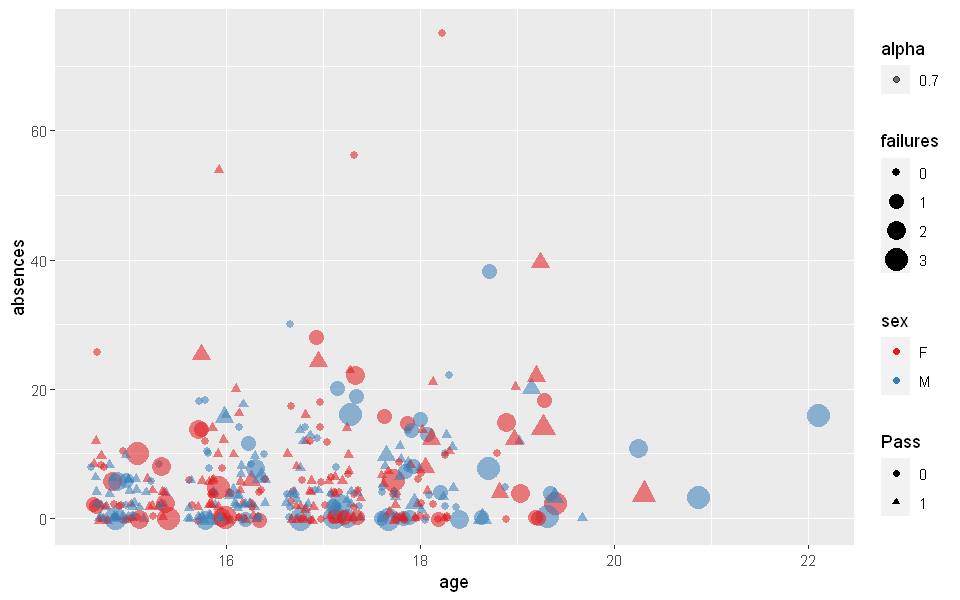

In [53]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(student_grades, aes(age, absences, size = failures, alpha = 0.7, shape = Pass, color = sex)) +
scale_colour_brewer(palette = 'Set1') +
geom_jitter()

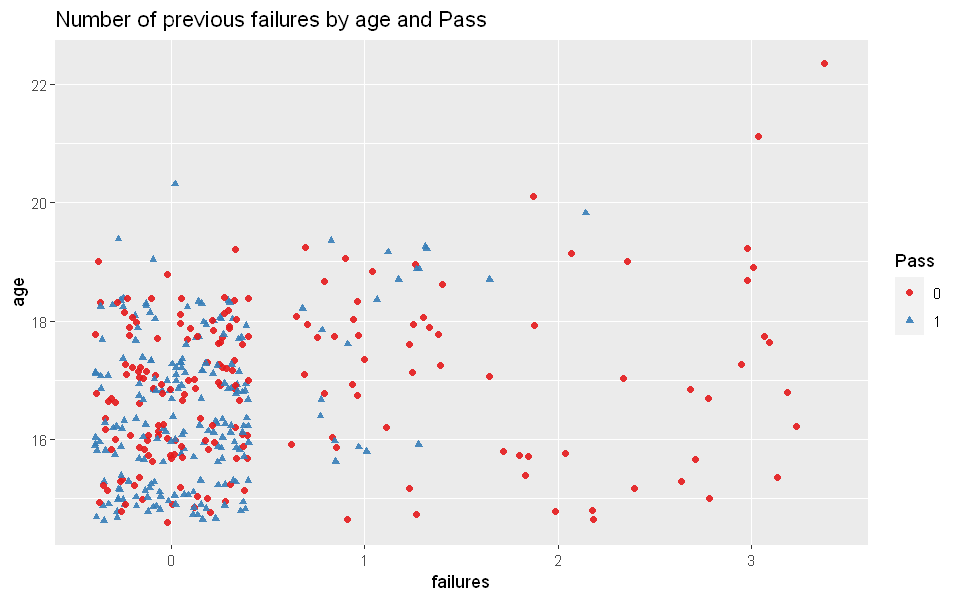

In [78]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(student_grades, aes(failures,age, shape = Pass, color = Pass)) +
scale_colour_brewer(palette = 'Set1') +
geom_jitter(alpha = 0.9) +
labs(title = 'Number of previous failures by age and Pass')

Absences and failures

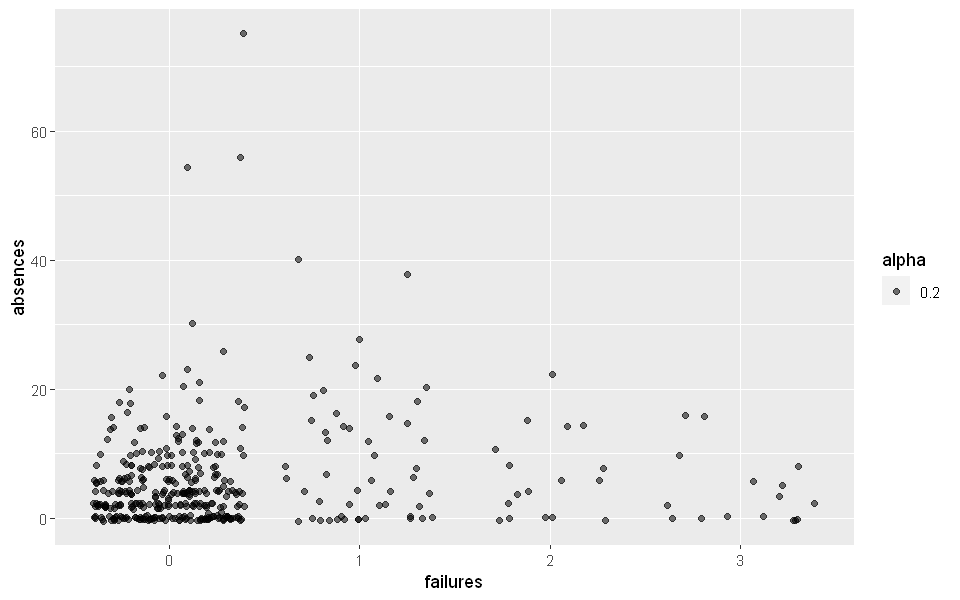

In [54]:
# Looking at absences and failures
ggplot(student_grades, aes(failures, absences, alpha = 0.2)) +
geom_jitter()

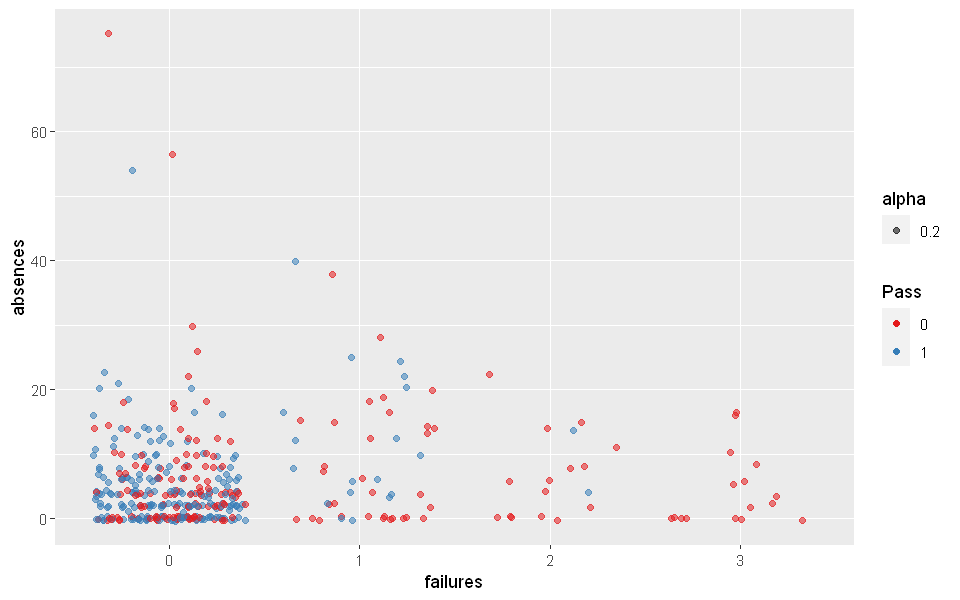

In [55]:
# Looking at absences and failures with Pass as a color aesthetic
ggplot(student_grades, aes(failures, absences, color = Pass, alpha = 0.2)) +
scale_colour_brewer(palette = 'Set1') +
geom_jitter()

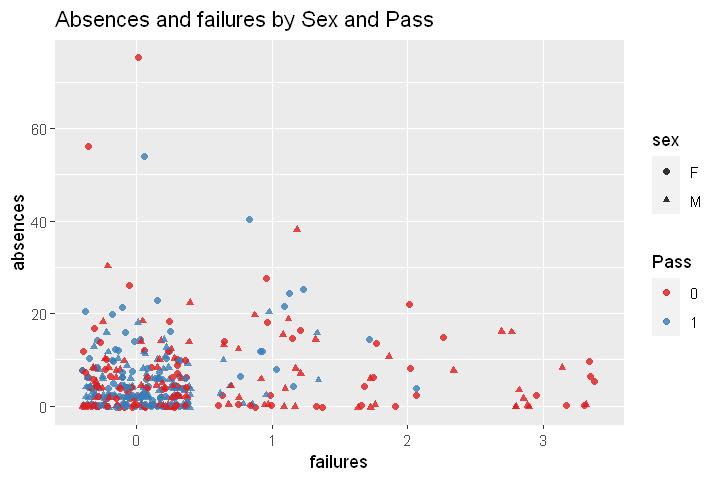

In [93]:
options(repr.plot.width=6, repr.plot.height=4)
# Looking at absences and failures with Pass as a color aesthetic and sex as a shape aesthetic
ggplot(student_grades, aes(failures, absences, color = Pass, shape = sex)) +
scale_colour_brewer(palette = 'Set1') +
geom_jitter(alpha = 0.8) +
labs(title='Absences and failures by Sex and Pass')

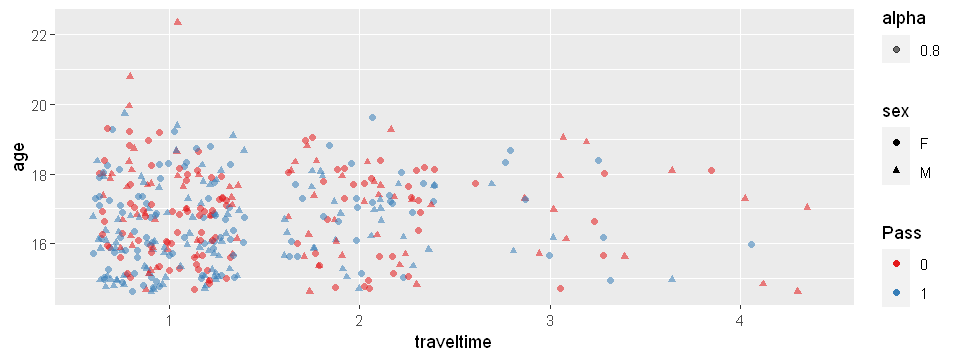

In [42]:
# Looking at absences and failures with Pass as a color aesthetic and sex as a shape aesthetic
ggplot(student_grades, aes(traveltime, age, color = Pass, shape = sex, alpha = 0.8)) +
scale_colour_brewer(palette = 'Set1') +
geom_jitter()

#### Data preparation

We just delete absences greater than 35 and all the outliers in the age feature.

In [45]:
# removing outliers in absences
student_grades <- student_grades %>%
subset(absences < 35)

In [46]:
# Remove outliers in age
outliers_age <- boxplot(student_grades$age, plot=FALSE)$out
student_grades <- student_grades[-which(student_grades$age %in% outliers_age),]

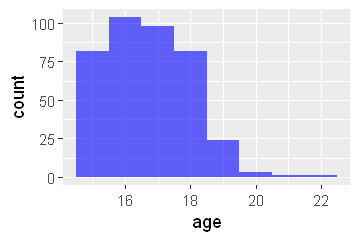

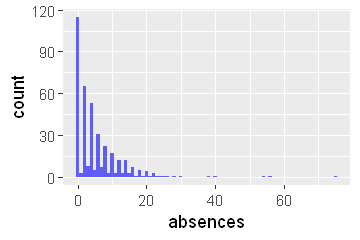

In [213]:
num_cols = c('age', 'absences')

plot_hist = function(df, numcols, bins = 10){
    options(repr.plot.width=3, repr.plot.height=2) # Set the initial plot area dimensions
    for(col in num_cols){
        if(is.numeric(df[,col])){
            p = ggplot(df, aes_string(col)) + 
                       geom_histogram(alpha = 0.6, binwidth = 1, fill = 'blue') 
            print(p)
        }
    }
}

plot_hist(student_grades, num_cols)

In [48]:
dim(student_grades)

[1] 389  31

#### learning outcomes

1. The model is heavily imbalanced as some variables have classes with big disparity in composition.


a. The assumption of feature independence. b. The assumption of observational independence.  c. The assumption of the approximation of normally distributed data. d. The assumption of accurately recorded data. 

References

N. Alalwan, W. M. Al-Rahmi, O. Alfarraj, A. Alzahrani, N. Yahaya and A. M. Al-Rahmi, "Integrated Three Theories to Develop a Model of Factors Affecting Students’ Academic Performance in Higher Education," 
in IEEE Access, vol. 7, pp. 98725-98742, 2019, doi: 10.1109/ACCESS.2019.2928142.

Michaela C. Pascoe, Sarah E. Hetrick & Alexandra G. Parker (2020) The impact of stress on students in secondary school and higher education, International Journal of Adolescence and Youth, 25:1, 104-112, 
DOI: 10.1080/02673843.2019.1596823